In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melanoma-cancer-dataset/test/Benign/6588.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6399.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6324.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/7222.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6560.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6943.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6365.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6459.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6653.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/7006.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6925.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/7245.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6800.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6899.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6831.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/7061.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6337.j

# **1. Introduction**


Nama : Tasya Amalia


Ini dibuat untuk mengidentifkasi Kanker Kulit Melanoma yang dapat dibedakan antara `Melanoma Jinak (Benign) dan Melanoma Ganas(Malignant)` menggunakan konsep model Computer Vision dengan Artificial Neural Network.

- **Sumber Data:**

    Dataset ini bersumber dari Kaggle [Melanoma Cancer](https://www.kaggle.com/datasets/bhaveshmittal/melanoma-cancer-dataset/data)

- **Ringkasan Data:**

    Dataset ini berisi gambar Kanker Kulit Melanoma dengan tipe Jinak (Benign) dan Ganas (Malignant) yang berukuran 224 x 224 pixels.
    

- **Deployment**

  Untuk link deployment dalam mengidentifikasi Kanker Kulit Melanoma, dapat dilihat disini!(belom ada)

- **Model Sequential Improvement**

  Pemodelan [Model Sequential Improvement](https://drive.google.com/file/d/1XcXw5j-pA0VfwTYm7zNaG3WdOE7I1iXL/view?usp=sharing)


# **2. Import Libraries**

In [2]:
# Library Data Manipulation
import os
import cv2
import glob
import random
import numpy as np
import pandas as pd

# Library Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image


# Library Preprocessing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


# Library Model Definition & Training
import tensorflow as tf
from tensorflow import keras
from keras import layers
# from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,Input,Add, BatchNormalization
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Library Model Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

# Library Save Model
import pickle
import joblib
import json

import warnings
warnings.filterwarnings('ignore')


2024-06-18 12:20:10.416166: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-18 12:20:10.416294: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-18 12:20:10.530938: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Penjelasan:**

Sebelum memulai tugas ini, perlu dilakukan mengimport semua library yang diperlukan untuk memfasilitasi pengerjaan tugas. Setiap library memiliki fungsi nya masing-masing yang terdiri untuk memuat data, manipulasi data, visualisasi data, mendefinisikan dan melatih model hingga evaluasi model.  

# **3. Data Loading**

In [3]:
dataset_dir="/kaggle/input/melanoma-cancer-dataset"
train_dataset_dir= os.path.join(dataset_dir, "train")
test_dataset_dir= os.path.join(dataset_dir, "test")

**Penjelasan:**

Kode tersebut digunakan untuk menetapkan `dataset_dir`, `train_dataset_dir`, dan `test_dataset_dir` dari dataset melanoma cancer untuk memudahkan mengakses dataset.

In [4]:
IMG_SIZE = (224, 224)

**Penjelasan:**

Mendefinisikan variabel `IMG_SIZE` untuk ukuran gambar yang akan dianalisis berukuran 224 x 224 pixels.


In [5]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dataset_dir,
                                                            shuffle=True,
                                                            image_size=IMG_SIZE)

Found 11879 files belonging to 2 classes.


**Penjelasan:**

Berdasarkan hasil tersebut, diketahui bahwa `Dataset Melanoma Cancer` pada data train memiliki 11.879 gambar mengenai Kanker Kulit Melanoma yang terdiri dari 2 kelas

In [6]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dataset_dir,
                                                            shuffle=True,
                                                            image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.


**Penjelasan:**

Berdasarkan hasil tersebut, diketahui bahwa `Dataset Melanoma Cancer` pada data test memiliki 2.000 gambar mengenai Kanker Kulit Melanoma yang terdiri dari 2 kelas

In [7]:
def check_path(path):
  labels = os.listdir(path)
  for label in labels:
    num_data = len(os.listdir(os.path.join(path, label)))
    print(f'Total Data - {label} : {num_data}')

print('Train Path')
check_path(train_dataset_dir)
print('')

print('Test Path')
check_path(test_dataset_dir)
print('')

Train Path
Total Data - Benign : 6289
Total Data - Malignant : 5590

Test Path
Total Data - Benign : 1000
Total Data - Malignant : 1000



**Penjelasan:**
**Penjelasan:**

Berdasarkan hasil tersebut, diketahui bahwa:
- Pada `Data Train` terdapat 5590 data dengan kelas _Malignant_ dan terdapat 6289 data dengan kelas _Benign_.
- Pada `Data Test` terdapat 1000 data dengan kelas _Malignant_ dan terdapat 1000 data dengan kelas _Benign_.

In [8]:
# Ukuran gambar
IMG_SIZE = 224
path = '/kaggle/input/melanoma-cancer-dataset'

datagen = tf.keras.preprocessing.image.ImageDataGenerator()
data_melanoma = datagen.flow_from_directory(path, (IMG_SIZE, IMG_SIZE), batch_size=32, class_mode='binary', shuffle=False)

Found 13879 images belonging to 2 classes.


**Penjelasan:**

Berdasarkan hasil tersebut, diketahui bahwa `Dataset Melanoma` memiliki 13.879 gambar mengenai Kanker Kulit Melanoma yang terdiri dari 2 kelas. Selain itu setiap gambar akan diubah ukurannya menjadi 224 x 224 piksel.

In [9]:
# Menampilkan Tipe Data dari `data_melanoma`
data_melanoma

**Penjelasan:**

Berdasarkan hasil tersebut, diketahui bahwa objek `data_melanoma` merupakan  instance dari kelas DirectoryIterator

In [10]:
# Menampilkan gambar dalam bentuk pixels

print('Images : ', data_melanoma[0][0])
print('Shape  : ', data_melanoma[0][0].shape)

Images :  [[[[113.  76.  60.]
   [118.  81.  63.]
   [125.  83.  67.]
   ...
   [112.  76.  64.]
   [110.  70.  58.]
   [107.  67.  55.]]

  [[113.  76.  60.]
   [119.  82.  64.]
   [123.  84.  67.]
   ...
   [110.  72.  59.]
   [108.  68.  56.]
   [105.  65.  53.]]

  [[114.  77.  61.]
   [119.  82.  64.]
   [123.  84.  67.]
   ...
   [111.  74.  58.]
   [108.  69.  54.]
   [105.  66.  51.]]

  ...

  [[ 94.  69.  64.]
   [113.  86.  79.]
   [123.  91.  80.]
   ...
   [108.  73.  54.]
   [101.  66.  47.]
   [ 95.  60.  41.]]

  [[100.  75.  71.]
   [115.  88.  81.]
   [121.  89.  78.]
   ...
   [ 99.  63.  47.]
   [ 96.  60.  44.]
   [ 94.  58.  42.]]

  [[ 63.  38.  34.]
   [ 76.  49.  42.]
   [ 80.  47.  38.]
   ...
   [ 48.  12.   0.]
   [ 49.  13.   0.]
   [ 50.  14.   0.]]]


 [[[191. 156. 162.]
   [193. 158. 164.]
   [196. 161. 167.]
   ...
   [206. 168. 167.]
   [205. 167. 166.]
   [203. 165. 164.]]

  [[193. 158. 164.]
   [194. 159. 165.]
   [195. 160. 166.]
   ...
   [207. 16

**Penjelasan**

Berdasarkan hasil tersebut diketahui `Shape  :  (32, 224, 224, 3)` menunjukkan bahwa gambar yang di proses setiap batch berjumlah 32 gambar dengan ukuran 224 x 224 pixels dan warna RGB.


# **4. Exploratory Data Analysis (EDA)**


Pada langkah ini, EDA bertujuan untuk memahami karakteristik dan struktur dari dataset gambar sebelum melakukan pemodelan lebih lanjut. Dengan mengeksplorasi data dapat mendapatkan wawasan dan pemahaman mengenai dataset yang akan di analisis.

### ***Distribusi Dataset***

Train Path
Total Data - Benign : 6289
Total Data - Malignant : 5590

Test Path
Total Data - Benign : 1000
Total Data - Malignant : 1000



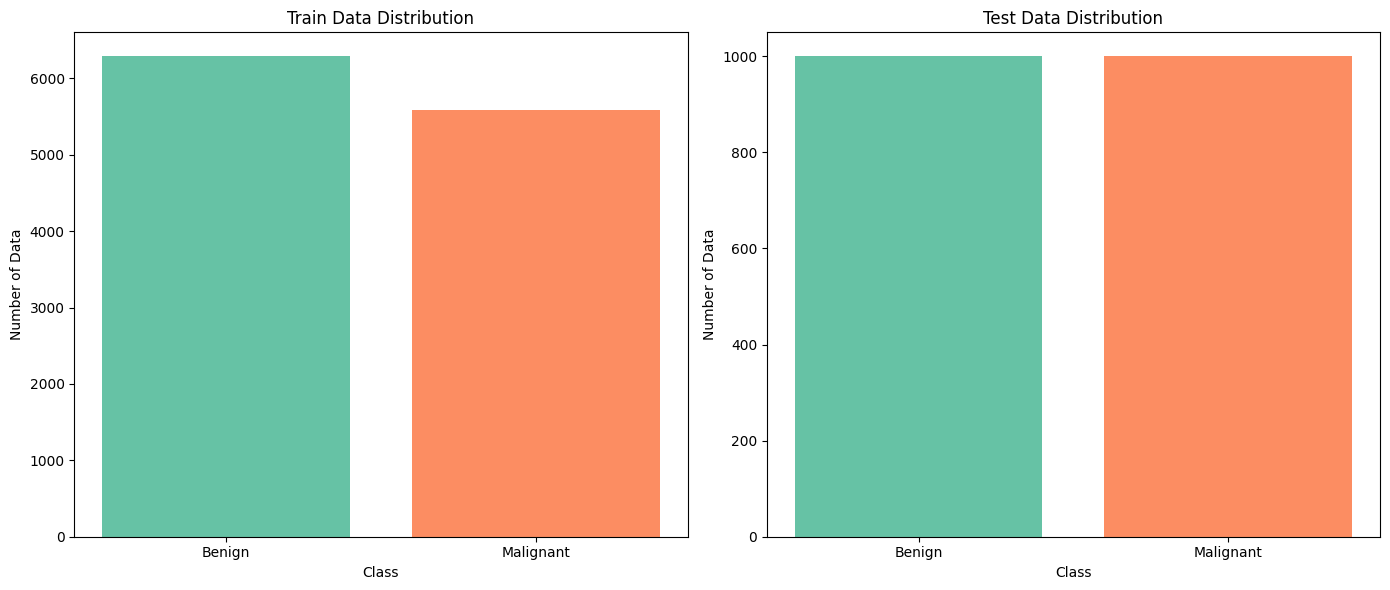

In [11]:
# Memeriksa struktur direktori dan menghitung jumlah file
def check_path(path):
    labels = os.listdir(path)
    data_count = {}
    for label in labels:
        num_data = len(os.listdir(os.path.join(path, label)))
        data_count[label] = num_data
        print(f'Total Data - {label} : {num_data}')
    return data_count

# Path ke direktori yang berisi dataset train dan test
train_path = '/kaggle/input/melanoma-cancer-dataset/train/'
test_path = '/kaggle/input/melanoma-cancer-dataset/test/'

# Menghitung Jumlah Data Train
print('Train Path')
train_data_count = check_path(train_path)
print('')

# Menghitung Jumlah Data Test
print('Test Path')
test_data_count = check_path(test_path)
print('')

# Mengatur Warna
colors = sns.color_palette('Set2')

# Membuat Visualisasi dengan bar chart
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Diagram batang untuk data training
ax[0].bar(train_data_count.keys(), train_data_count.values(), color=colors)
ax[0].set_title('Train Data Distribution')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of Data')

# Diagram batang untuk data testing
ax[1].bar(test_data_count.keys(), test_data_count.values(), color=colors)
ax[1].set_title('Test Data Distribution')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Number of Data')

plt.tight_layout()
plt.show()


**Penjelasan:**

Berdasarkan Visualisasi Distribusi Data Train dan Test, diketahui bahwa:
- Pada `Data Train` terdapat 5590 data dengan kelas _Malignant_ dan terdapat 6289 data dengan kelas _Benign_.
- Pada `Data Test` terdapat 1000 data dengan kelas _Malignant_ dan terdapat 1000 data dengan kelas _Benign_.

In [12]:
def display_images(directory, num_images=5):
    """
    Menampilkan sejumlah gambar dari direktori yang diberikan.

    Args:
    directory (str): Path ke direktori yang berisi gambar.
    num_images (int): Jumlah gambar yang akan ditampilkan.
    """
    labels = os.listdir(directory)
    
    fig, axs = plt.subplots(len(labels), num_images, figsize=(num_images * 3, len(labels) * 3))
    
    for i, label in enumerate(labels):
        label_dir = os.path.join(directory, label)
        image_files = os.listdir(label_dir)[:num_images]
        
        for j, image_file in enumerate(image_files):
            image_path = os.path.join(label_dir, image_file)
            image = Image.open(image_path)
            axs[i, j].imshow(image)
            axs[i, j].axis('off')
            axs[i, j].set_title(label, fontsize=12)
            if j == 0:
                axs[i, j].set_ylabel(label, fontsize=12)
    
    plt.tight_layout()
    plt.show()


### ***Gambar Melanoma Cancer Data Train***

Train Dataset:


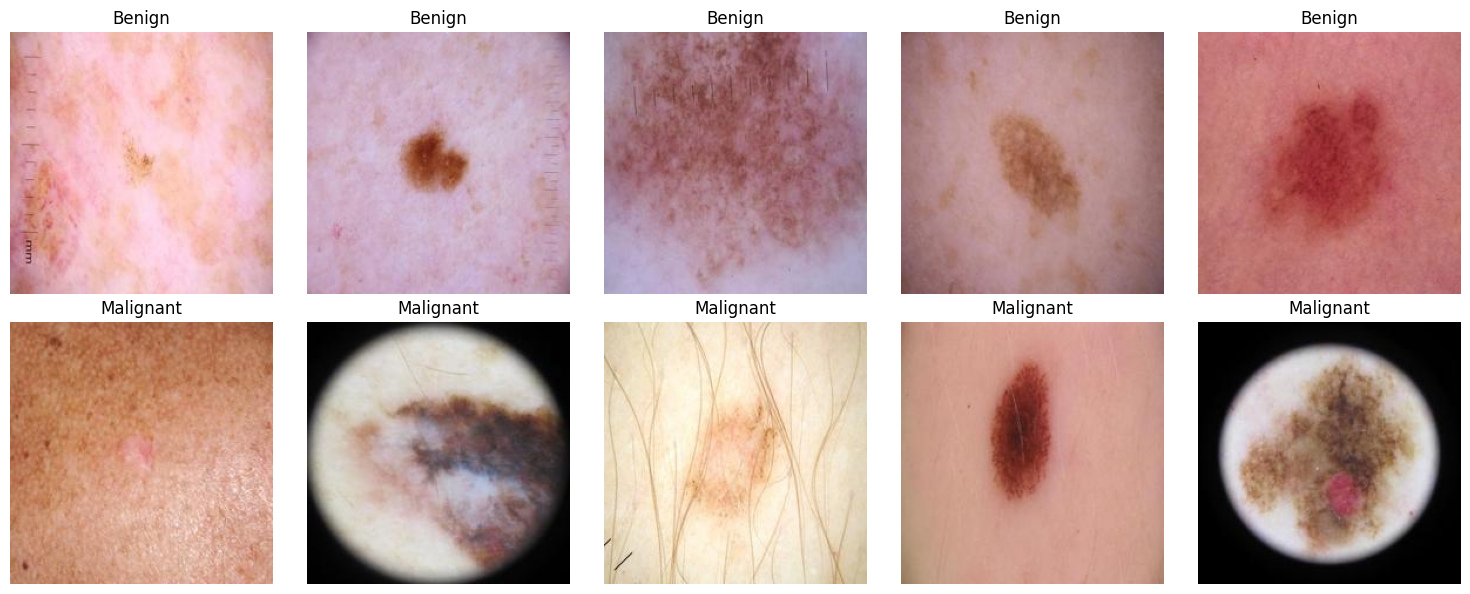

In [13]:
# Menampilkan 5 gambar dari train dataset
print("Train Dataset:")
display_images(train_dataset_dir, num_images=5)


**Penjelasan:**


Gambar tersebut menunjukkan Kanker Kulit Melanoma jenis Benign dan Malignant pada data training. 



### ***Gambar Melanoma Cancer Data Test***

Test Dataset:


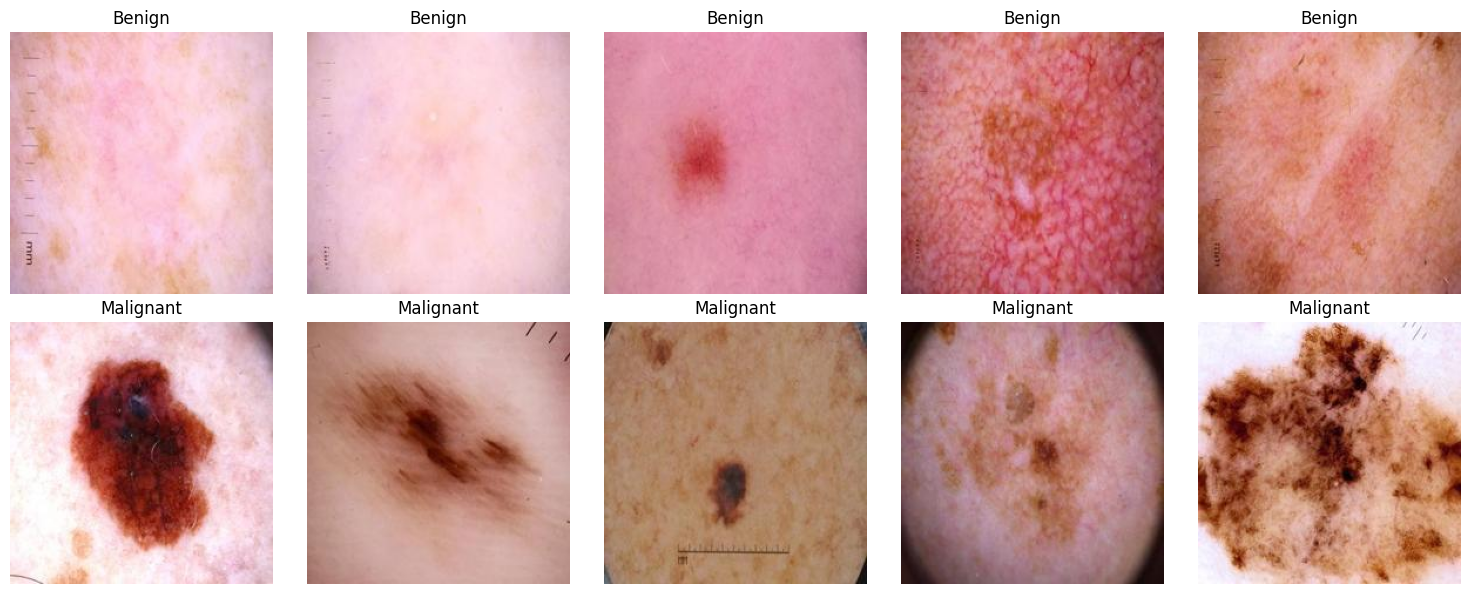

In [14]:
# Menampilkan 5 gambar dari test dataset
print("Test Dataset:")
display_images(test_dataset_dir, num_images=5)

**Penjelasan:**

Gambar tersebut menunjukkan Kanker Kulit Melanoma jenis Benign dan Malignant pada data testing. 

# **5. Feature Engineering**

In [15]:
# Mendefinisikan Hyperparameter

img_height= 224
img_width= 224
batch_size= 32

**Penjelasan:**


Kode tersebut mendefinisikan ukuran tingi dan lebar gambar yang berukuran 224 x 224 piksel dengan batch size sebesar 32. 

In [16]:
# Fungsi untuk memeriksa struktur direktori
def check_directory_structure(directory):
    for root, dirs, files in os.walk(directory):
        print(f"Directory: {root}")
        for name in dirs:
            print(f"  Subdirectory: {name}")
        for name in files:
            print(f"  File: {name}")

# Membuat instance ImageDataGenerator untuk data pelatihan dengan augmentasi
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.4)

# Data Augmentation - Combine all previous data augmentations
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                                                         rescale=1./255,
                                                         horizontal_flip=True,
                                                         zoom_range=0.5,
                                                         rotation_range=90,
                                                         shear_range=0.5,
                                                         fill_mode='nearest',
                                                         validation_split=0.4)

# Membuat data generator untuk data training
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=2,
    subset='training'
)

# Membuat data generator untuk data validation
validation_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    seed=2,
    subset='validation'
)

# Membuat data generator untuk data testing
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    seed=2
)

# Menampilkan Hasil
print("Class indices:", train_data.class_indices)


Found 7128 images belonging to 2 classes.
Found 4751 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Class indices: {'Benign': 0, 'Malignant': 1}


**Penjelasan:**

- Kode tersebut digunakan untuk membagi gambar untuk data training, validation dan testing untuk dilakukan pemodelan.

- Terdapat 7128 gambar untuk Data Training, 4.751 gambar untuk Data Validation dan 2.000 gambar untuk Data Testing.

- Dilakukan juga data preprocessing atau Data Augmentasi pada data training yang bertujuan untuk meningkatkan variasi gambar pada data pelatihan sehingga membantu model untuk mempelajari gambar baru dan tidak bergantung pada detail gambar dari data pelatihan, hal ini untuk mengurangi overfitting. 

- Data Augmentasi hanya dilakukan pada data training saja dan tidak dilakukan pada data testing maupun data validasi untuk menjaga karakteristik asli gambar nya. Berikut data augmentasi yang dilakukan sebagai berikut:

        a. Rescale = 1./255, yaitu gambar dilakukan scaling dengan membagi setiap piksel dengan 255.
        
        b. horizontal_flip = True, yaitu gambar akan dibalik secara horizontal.
        
        c. zoom_range=0.5, yaitu  gambar akan di-zoom, baik diperbesar maupun diperkecil.
        
        d. rotation_range=90, yaitu gambar akan diputar secara acak hingga 90 derajat. 
        
        e. fill_mode='nearest, yaitu gambar yang telah melakukan transformasi dan beberapa piksel di tepi gambar yang akan melampaui batas gambar asli akan diisi dengan nilai piksel terdekat.
    
- Validation_split=0.4, yaitu data akan dipisahkan 40% untuk data validation dan 60% untuk data training



**Data Train**

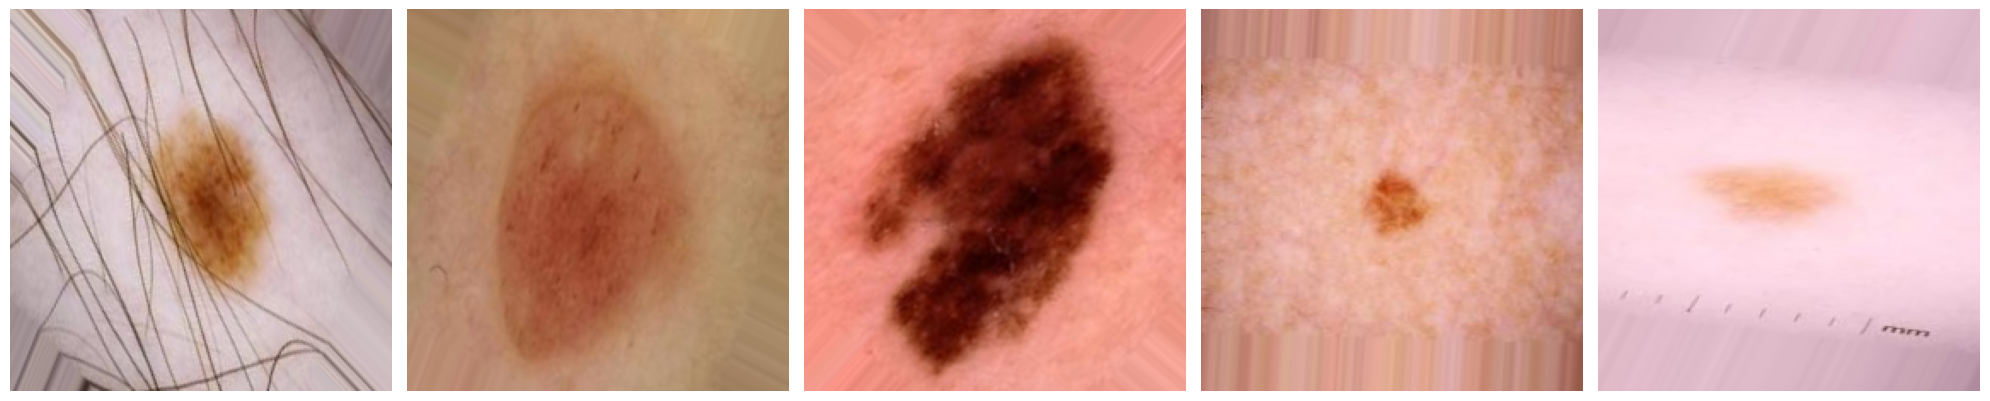

In [17]:
def plot_images_from_generator(generator):
    x, y = next(generator)
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(x, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_images_from_generator(train_data)

**Penjelasan:**


Gambar tersebut menunjukkan Kanker Kulit Melanoma pada data training yang telah dilakukan `Data Augmentasi`.


# **6. ANN Training**

## **6.1 Sequential API**

### **a. Model Definition**


In [18]:
# Seed untuk reproduktifitas
seed = 20

tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)


model_seq = Sequential()
model_seq.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model_seq.add(MaxPooling2D(2, 2))
model_seq.add(Conv2D(64, (3, 3), activation='relu'))
model_seq.add(MaxPooling2D(2, 2))
model_seq.add(Conv2D(128, (3, 3), activation='relu'))
model_seq.add(MaxPooling2D(2, 2))
model_seq.add(Conv2D(256, (3, 3), activation='relu'))
model_seq.add(MaxPooling2D(2, 2))
model_seq.add(Flatten())
model_seq.add(Dropout(0.5))
model_seq.add(Dense(512, activation='relu'))
model_seq.add(Dense(1, activation='sigmoid'))

# Compile model
model_seq.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Menampilkan ringkasan model
model_seq.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,263,809 (73.49 MB)

 Trainable params: 19,263,809 (73.49 MB)

 Non-trainable params: 0 (0.00 B)

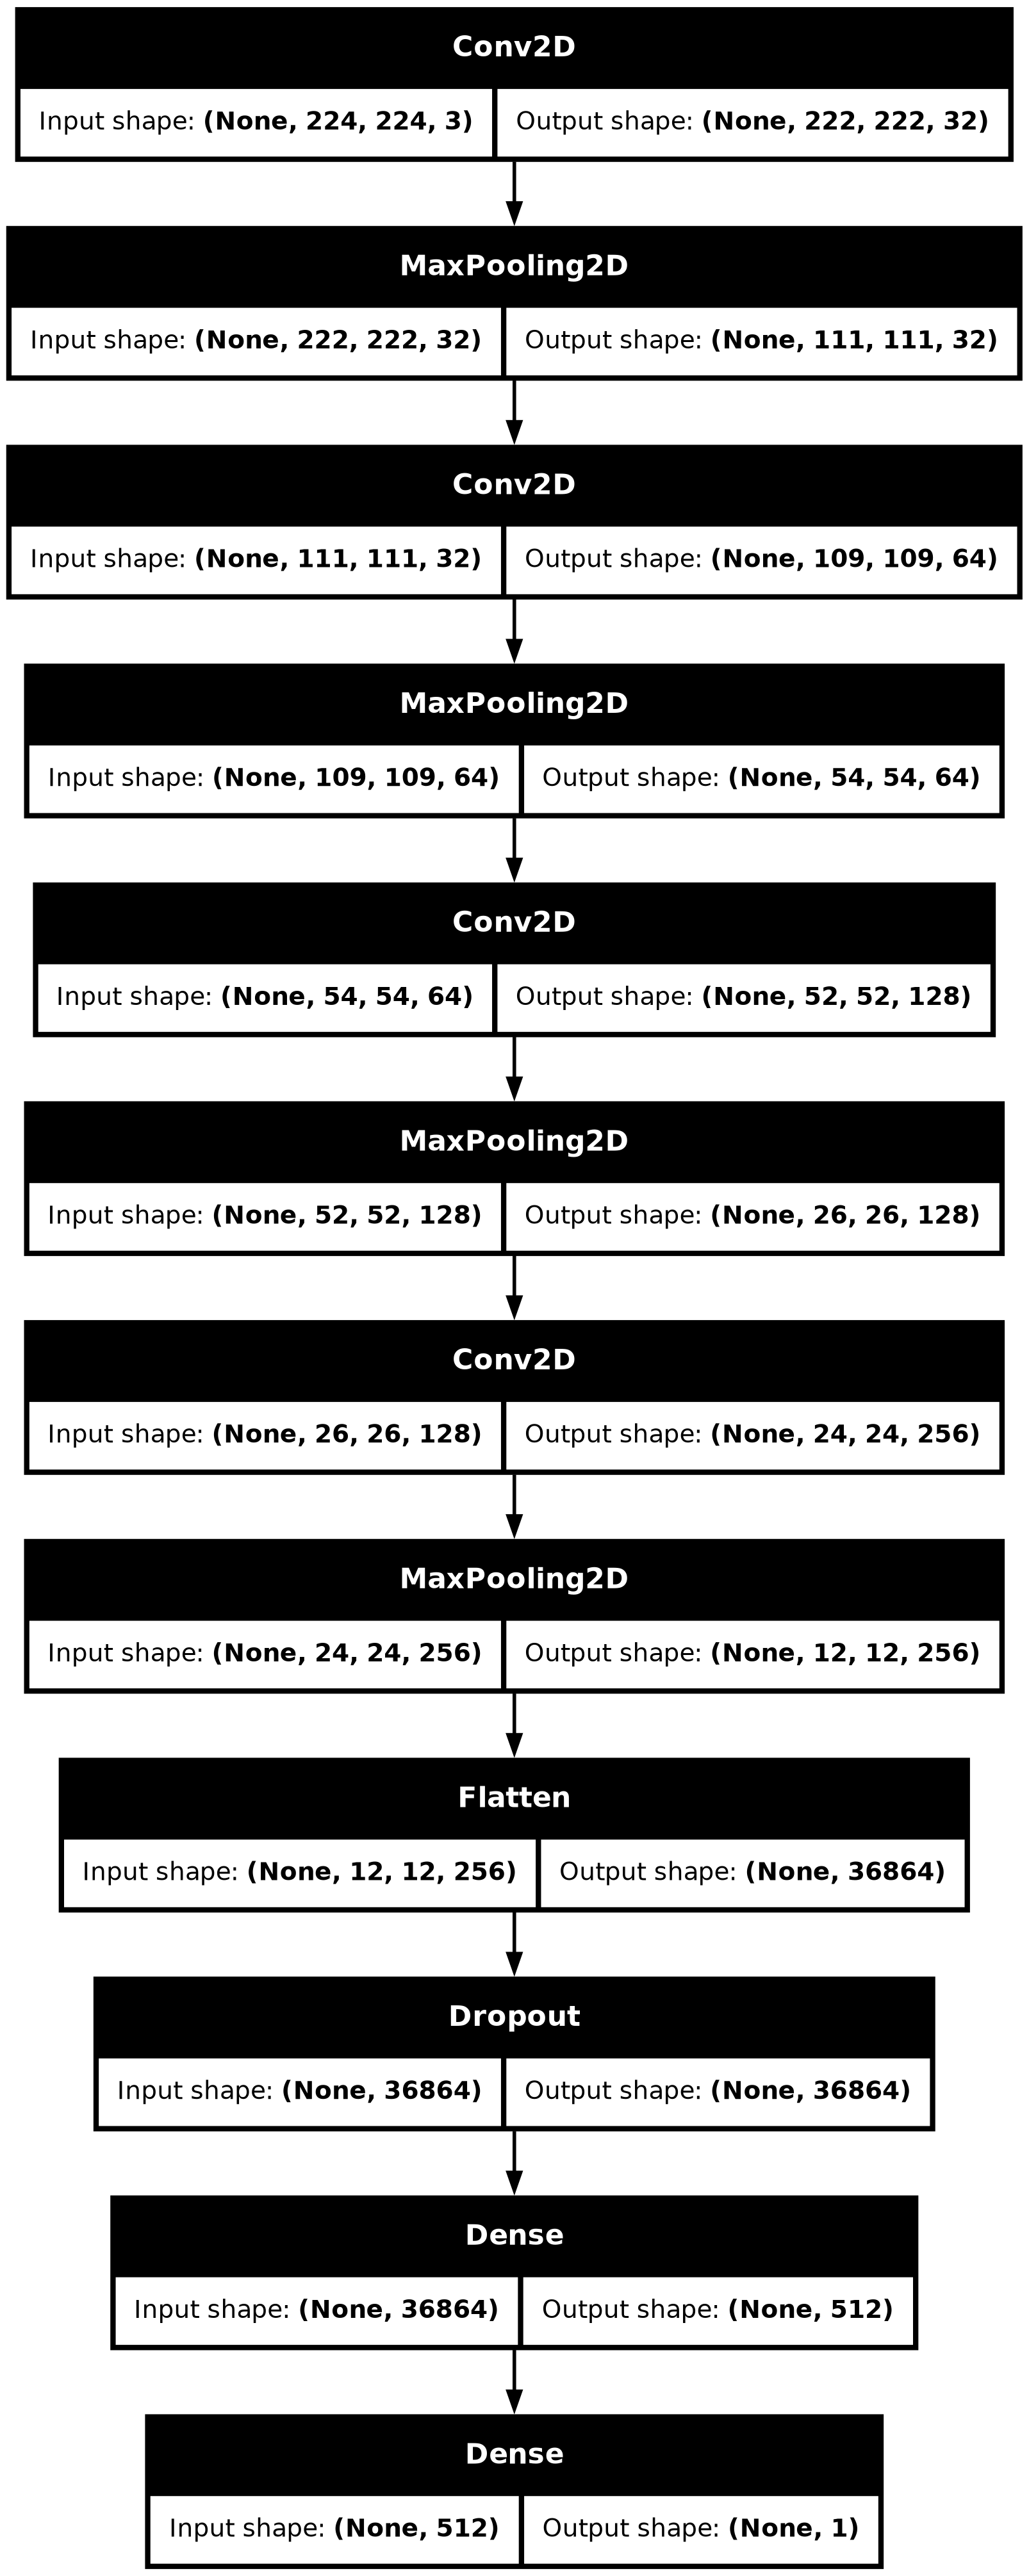

In [19]:
# Plot layers
tf.keras.utils.plot_model(model_seq, show_shapes=True)

**Penjelasan:**

Visualisasi diatas merupakan arsitektur dari model sequential yang menampilkan setiap layer dalam model. 

### **b. Model Training**

In [20]:
%%time
history_model_seq = model_seq.fit(train_data, epochs=25, validation_data = validation_data, batch_size=batch_size)

Epoch 1/25
  2/223 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.5859 - loss: 1.2355   

I0000 00:00:1718713254.714710     117 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718713254.734249     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


154/223 ━━━━━━━━━━━━━━━━━━━━ 37s 539ms/step - accuracy: 0.6510 - loss: 0.6712

W0000 00:00:1718713337.111099     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.6741 - loss: 0.6317

W0000 00:00:1718713369.681262     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


223/223 ━━━━━━━━━━━━━━━━━━━━ 204s 846ms/step - accuracy: 0.6743 - loss: 0.6312 - val_accuracy: 0.7007 - val_loss: 0.5746
Epoch 2/25


W0000 00:00:1718713442.631198     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


223/223 ━━━━━━━━━━━━━━━━━━━━ 130s 574ms/step - accuracy: 0.8163 - loss: 0.4193 - val_accuracy: 0.7872 - val_loss: 0.4625
Epoch 3/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 130s 572ms/step - accuracy: 0.8300 - loss: 0.3934 - val_accuracy: 0.7834 - val_loss: 0.5076
Epoch 4/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 130s 572ms/step - accuracy: 0.8373 - loss: 0.3811 - val_accuracy: 0.8005 - val_loss: 0.4368
Epoch 5/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 132s 582ms/step - accuracy: 0.8378 - loss: 0.3788 - val_accuracy: 0.8200 - val_loss: 0.4216
Epoch 6/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 130s 574ms/step - accuracy: 0.8431 - loss: 0.3693 - val_accuracy: 0.8089 - val_loss: 0.4231
Epoch 7/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 131s 579ms/step - accuracy: 0.8494 - loss: 0.3615 - val_accuracy: 0.8175 - val_loss: 0.3959
Epoch 8/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 130s 575ms/step - accuracy: 0.8473 - loss: 0.3514 - val_accuracy: 0.7988 - val_loss: 0.4199
Epoch 9/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 131s 576ms/step - accuracy: 0.8552 - loss: 0.33

**Penjelasan:**

Hasil tersebut merupakan hasil training model sequential pada data training dan validation selama 59 menit 5 detik dan sebanyak 25 epoch.

### **c. Model Evaluation**

#### **Grafik Model Evaluasi**

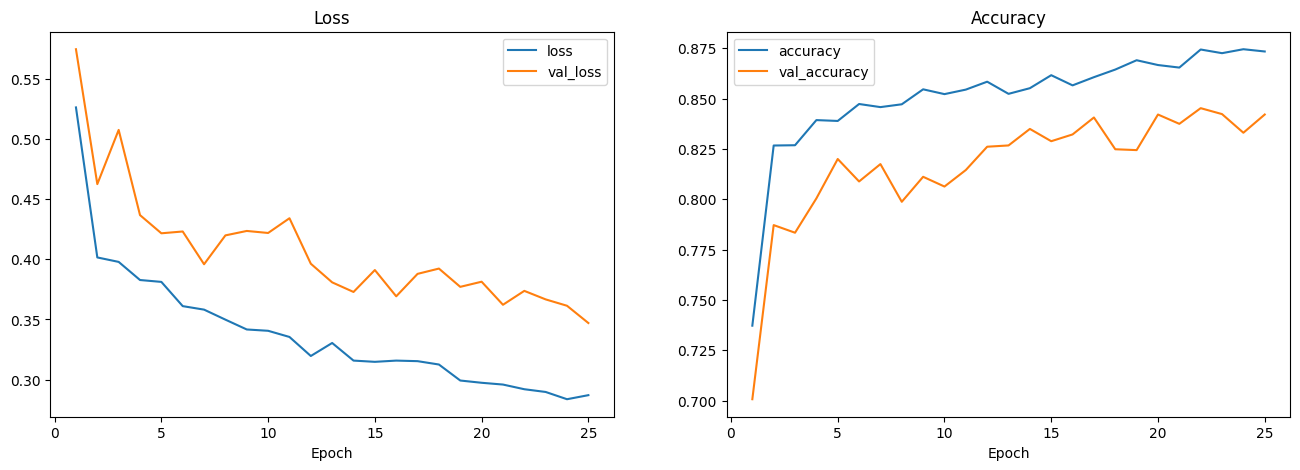

In [26]:
# Menampilkan Visualisasi Performa Model
epoch=25

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_model_seq.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_model_seq.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')


ax[1].plot(range(1,epoch+1),history_model_seq.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_model_seq.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')


plt.show()

**Penjelasan:**

Berdasarkan visualisasi tersebut diketahui bahwa performa dari model sequential selama 25 epoch mengalami overfitting yang fluktuasi pada data training dan data validasi. 

- Grafik Loss: Nilai Loss pada data training mengalami penurunan seiring berjalannya epoch,sedangkan nilai loss pada data validasi mengalami fluktuasi


- Grafik Accuracy: Nilai accuracy pada data training meningkat cukup stabil seiring berjalannya epoch,sedangkan nilai loss pada data validasi mengalami peningkatan meskipun terdapat fluktuasi

Secara keseluruhan model menunjukkan kinerja yang cukup baik pada data training, yaitu penurunan pada `nilai loss` dan peningkatan pada `nilai accuracy`. Pada data validasi, model mampu generalisasi dengan baik pada data yang belum dilihat meskipun terdapat fluktuasi. Oleh karena itu, perlu adanya perbaikan model untuk menurunkan nilai loss dan meningkatkan nilai accuracy.



#### **Nilai Loss dan Accuracy**

In [31]:
# Evaluasi model
loss, accuracy = model_seq.evaluate(test_data)
print(f"Test Loss Model Sequential: {loss}")
print(f"Test Accuracy Model Sequential: {accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9133 - loss: 0.2331
Test Loss Model Sequential: 0.321564644575119
Test Accuracy Model Sequential: 0.8615000247955322


**Penjelasan:**

Berdasarkan hasil evaluasi **model sequential**, diketahui bahwa:
- Nilai `Test Loss` sebesar 0.32 yang menunjukkan model cukup baik dalam meminimalkan kesalahan dalam prediksi.

- Nilai `Test Accuracy` sebesar 0.8615 yang menunjukkan model dapat memprediksi kelas yang benar pada sampel data uji sebesar 86.15%

Untuk menurunkan nilai `test loss` dan meningkatkan nilai `test accuracy` akan dilakukan pada model improvment. 

In [22]:
# Prediksi test data Model Sequential
y_pred_seq = model_seq.predict(test_data)
y_pred_seq

63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step


array([[0.22356772],
       [0.02151509],
       [0.12428448],
       ...,
       [0.92747647],
       [0.90895957],
       [0.8504821 ]], dtype=float32)

**Penjelasan:**

Berdasarkan hasil tersebut menunjukkan hasil prediksi model sequential pada data testing dalam bentuk array. Setiap nilai array menunjukkan probabilitas sampel masuk kedalam kelas 0 atau 1. 

#### **Classification Report**

In [23]:
# Cek Perfoma Data Testing
y_pred_seq = model_seq.predict(test_data)
y_pred_class_seq = np.where(y_pred_seq >= 0.5, 1, 0)  

# Menampilkan Classification Report
print(classification_report(test_data.classes, y_pred_class_seq, target_names=test_data.class_indices))

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step
              precision    recall  f1-score   support

      Benign       0.82      0.93      0.87      1000
   Malignant       0.92      0.79      0.85      1000

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



**Penjelasan:**

Berdasarkan hasil tersebut diketahui bahwa:

`a. Precision`
- Nilai Precision pada kelas `Benign` sebesar 0.82 yang artinya 82% semua prediksi yang menyatakan Melanoma Cancer Benign adalah benar-benar Benign.
- Nilai Precision pada kelas `Malignant` sebesar 0.92 yang artinya 92% semua prediksi yang menyatakan Melanoma Cancer Malignant adalah benar-benar Malignant.

`b. Recall`
- Nilai Recall pada kelas `Benign` sebesar 0.93 yang artinya model dapat mengidentifikasi kasus Melanoma Cancer Benign sebesar 93%.
- Nilai Recall pada kelas `Malignant` sebesar 0.79 yang artinya model dapat mengidentifikasi kasus Melanoma Cancer Malignant sebesar 79%

`c. F1-Score`
- Nilai F1-Score pada kelas `Benign` sebesar 0.87 yang artinya keseimbangan antara precision (0.82) dan recall (0.93) cukup baik.
- Nilai F1-Score pada kelas `Malignant` sebesar 0.85 yang artinya keseimbangan antara precision (0.92) dan recall (0.79) cukup baik.

`Kesimpulan`
- Model Sequential memiliki performa yang cukup baik dengan nilai **accuracy** sebesar 0.86.

#### **Confusion Matrix**

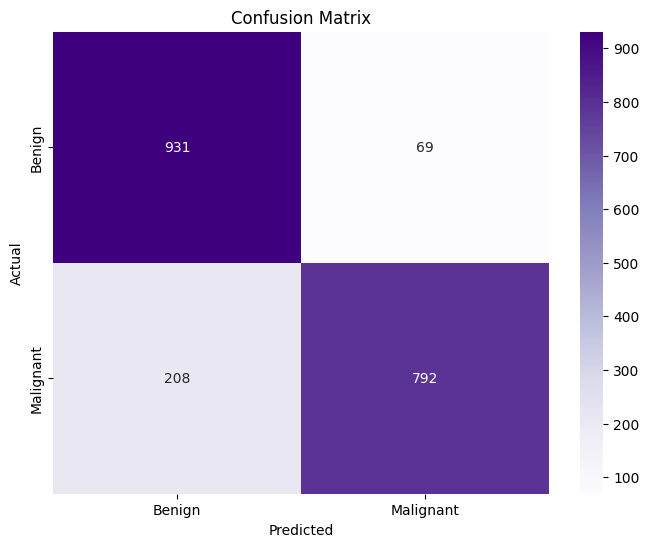

In [56]:
# Menghitung confusion matrix
cm = confusion_matrix(test_data.classes, y_pred_class_seq)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Penjelasan**

Berdasarkan confusion matrix, diketahui bahwa:

**a. True Positives (TP):**

    Model dengan benar memprediksi kasus Melanoma Cancer Malignant sejumlah 792 kasus.

**b. True Negatives (TN):**

    Model dengan benar memprediksi kasus Melanoma Cancer Benign sejumlah 931 kasus.

**c. False Positives (FP):**

    Model salah memprediksi 69 kasus Melanoma Cancer `Benign` sebagai Melanoma Cancer `Malignant`

**d. False Negatives (FN):**

    Model salah memprediksi 208 kasus Melanoma Cancer `Malignant` sebagai Melanoma Cancer `Benign`



## **6.2 Functional API**

### **a. Model Definition**

In [28]:
# Seed untuk reproduktifitas
seed = 20

tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)


inputs = Input(shape=(img_height, img_width, 3))


layer_1 = layers.Conv2D(16, (3, 3), activation='relu')(inputs)  
layer_1 = layers.MaxPooling2D((2, 2))(layer_1)

layer_2 = layers.Conv2D(32, (3, 3), activation='relu')(inputs)  
layer_2 = layers.MaxPooling2D((2, 2))(layer_2)

# Concatenate 
merged1 = layers.concatenate([layer_1, layer_2])


layer_3 = layers.Conv2D(64, (3, 3), activation='relu')(merged1)  
layer_3 = layers.MaxPooling2D((2, 2))(layer_3)

layer_4 = layers.Conv2D(128, (3, 3), activation='relu')(merged1)  
layer_4 = layers.MaxPooling2D((2, 2))(layer_4)

# Concatenate 
merged2 = layers.concatenate([layer_3, layer_4])


flatten = layers.Flatten()(merged2)


dense1 = layers.Dense(128, activation='relu')(flatten)  
dense2 = layers.Dropout(0.5)(dense1)
outputs = layers.Dense(1, activation='sigmoid')(dense2)

# Membuat Model
model_func = Model(inputs, outputs)

# Compile
model_func.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

# Display model summary
model_func.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 222, 222,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 222, 222,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 111, 111,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 111, 111,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 111, 111,  │          0 │ max_pooling2d[0]… │
│ (Concatenate)       │ 48)               │            │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     27,712 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 109, 109,  │     55,424 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 54, 54,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 54, 54,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 54, 54,    │          0 │ max_pooling2d_2[… │
│ (Concatenate)       │ 192)              │            │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 559872)    │          0 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │ 71,663,744 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 71,748,353 (273.70 MB)

 Trainable params: 71,748,353 (273.70 MB)

 Non-trainable params: 0 (0.00 B)

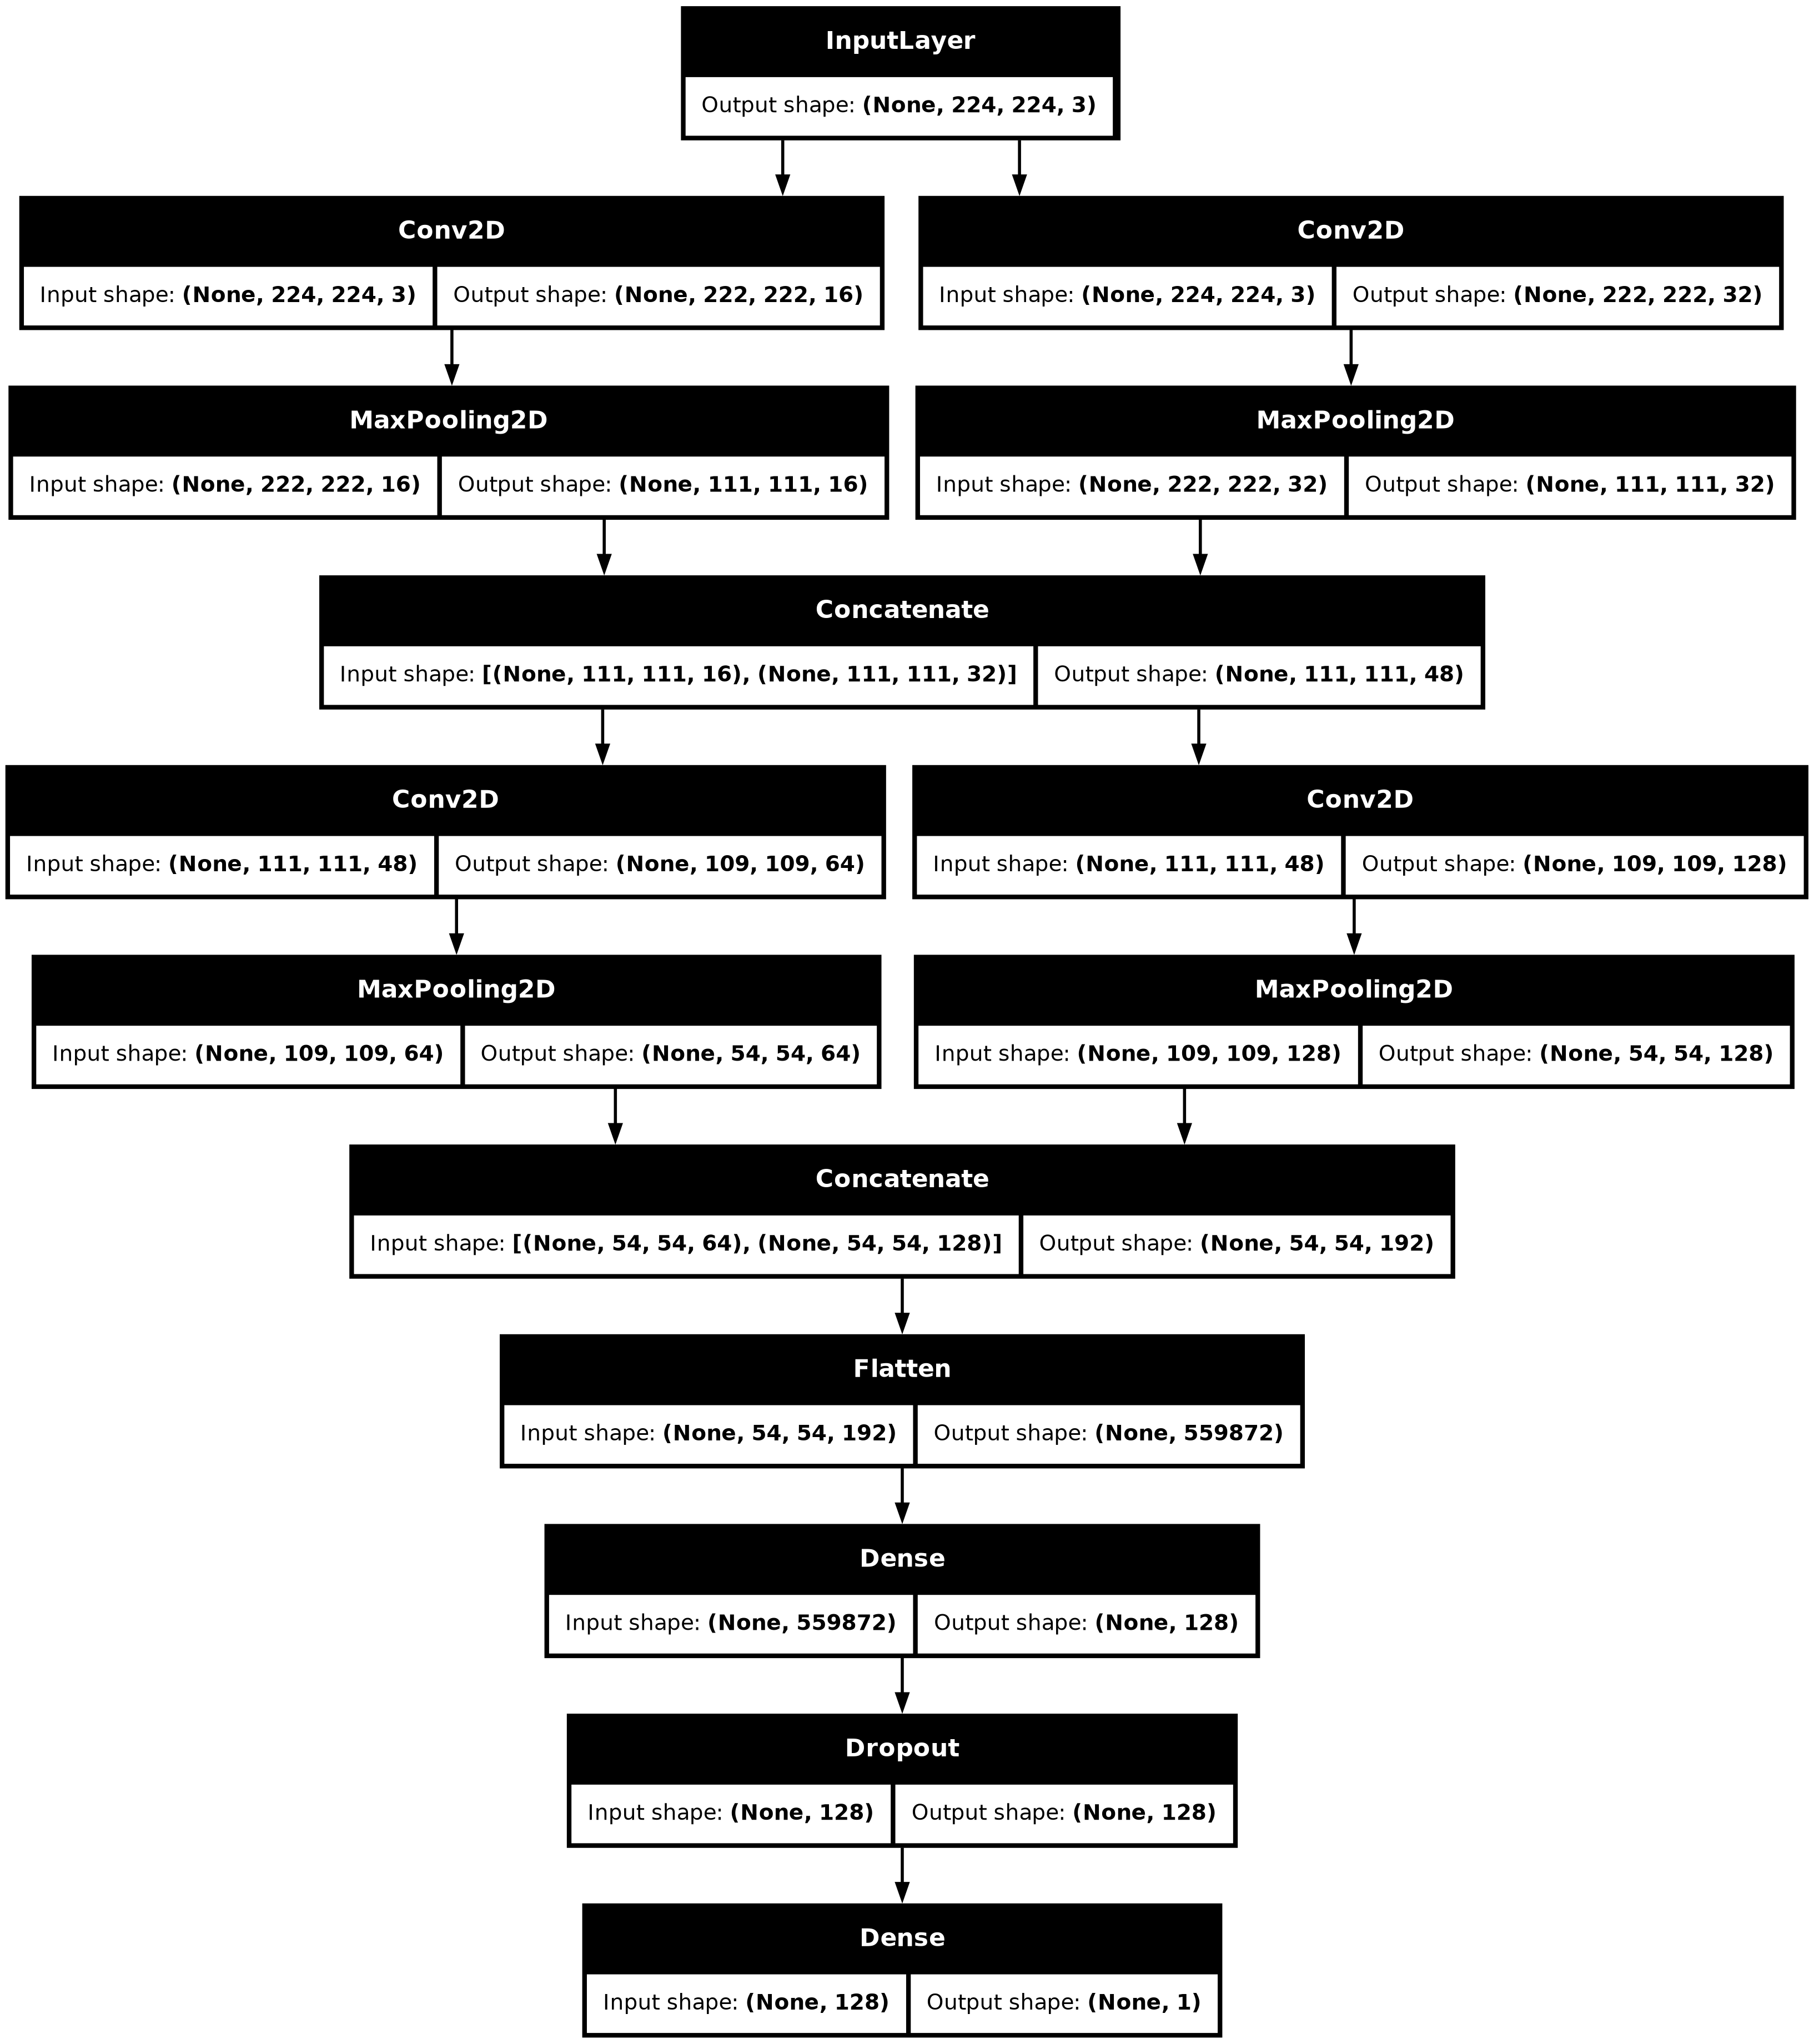

In [29]:
# Plot layers
tf.keras.utils.plot_model(model_func, show_shapes=True)

**Penjelasan:**

Visualisasi diatas merupakan arsitektur dari model functional yang menampilkan setiap layer dalam model. 

### **b. Model Training**

In [30]:
%%time
history_func = model_func.fit(train_data, epochs=25, steps_per_epoch=20, validation_data = validation_data)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 100s 4s/step - accuracy: 0.5511 - loss: 7.1750 - val_accuracy: 0.6632 - val_loss: 0.5995
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.7045 - loss: 0.5729 - val_accuracy: 0.5978 - val_loss: 0.6651
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.6551 - loss: 0.5725 - val_accuracy: 0.6493 - val_loss: 0.5962
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.7443 - loss: 0.4966 - val_accuracy: 0.7207 - val_loss: 0.5333
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.7564 - loss: 0.5291 - val_accuracy: 0.6702 - val_loss: 0.6081
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.6940 - loss: 0.5426 - val_accuracy: 0.6369 - val_loss: 0.6127
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.7600 - loss: 0.4871 - val_accuracy: 0.7055 - val_loss: 0.5528
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.7621 - loss: 0.4956 - val_accuracy: 0.7268 - val_loss

**Penjelasan:**

Hasil tersebut merupakan hasil training model functional pada data training dan validation selama 26 menit 58 detik dan sebanyak 25 epoch. Disini ditambahkan `steps_per_epoch` yaitu mengatur jumlah batch setiap epoch sebanyak 20 untuk mempercepat training. 


### **c. Model Evaluation**

#### **Grafik Evaluasi**

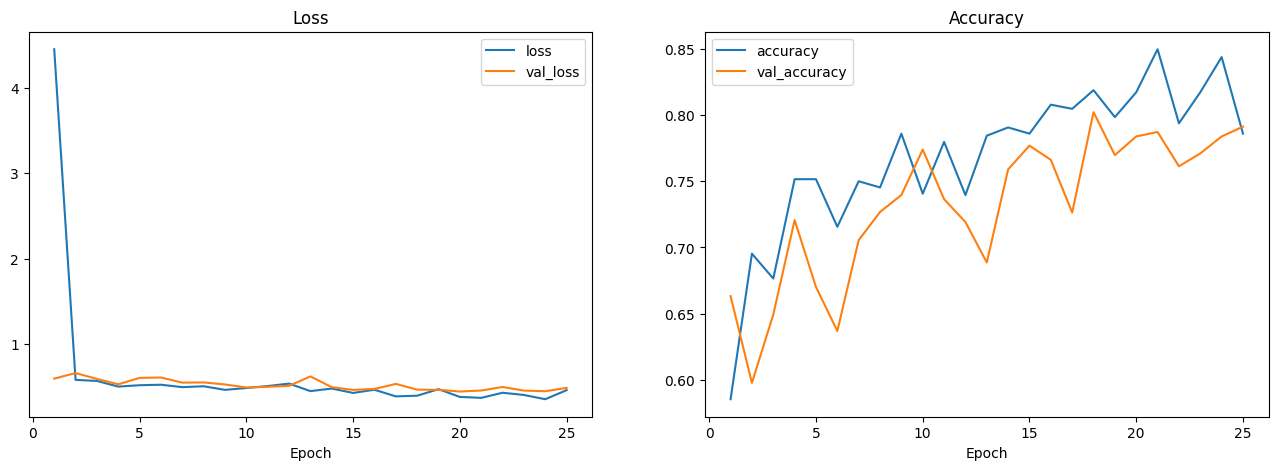

In [41]:
epoch=25

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_func.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_func.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')


ax[1].plot(range(1,epoch+1),history_func.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_func.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')


plt.show()

**Penjelasan:**

Berdasarkan visualisasi tersebut diketahui bahwa performa dari model functional selama 25 epoch mengalami overfitting yang fluktuasi pada data training dan data validasi. 

- Grafik Loss: Nilai Loss pada data training mengalami penurunan secara drastis pada awal training namun seiring berjalannya epoch terlihat menurun secara bertahap dan stabil yang menunjukkan model dapat belajar dengan baik. 


- Grafik Accuracy: Nilai Accuracy pada data training meningkat secara drastis pada awal training namun seiring berjalannya epoch terlihat meningkat secara konstan dan nilai accuracy pada data validasi mengalami peningkatan meskipun dengan beberapa fluktuasi yang menunjukkan model dapat generalisasi ke data yang belum dilihat.

Secara keseluruhan model menunjukkan kinerja yang cukup baik pada data training, yaitu penurunan pada `nilai loss` dan peningkatan pada `nilai accuracy`. Pada data validasi, model mampu generalisasi dengan baik pada data yang belum dilihat meskipun terdapat fluktuasi. Oleh karena itu, perlu adanya perbaikan model untuk menurunkan nilai loss dan meningkatkan nilai accuracy.



#### **Nilai Loss dan Accuracy**

In [43]:
# Evaluasi Model Functional
loss, accuracy = model_func.evaluate(test_data)
print(f"Test Loss Model Functional: {loss}")
print(f"Test Accuracy Model Functional: {accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.8691 - loss: 0.4164
Test Loss Model Functional: 0.4379020035266876
Test Accuracy Model Functional: 0.8370000123977661


**Penjelasan:**

Berdasarkan hasil evaluasi **model functional**, diketahui bahwa:
- Nilai `Test Loss` sebesar 0.43 yang menunjukkan model cukup baik dalam meminimalkan kesalahan dalam prediksi.

- Nilai `Test Accuracy` sebesar 0.8370 yang menunjukkan model dapat memprediksi kelas yang benar pada sampel data uji sebesar 83.70%

Untuk menurunkan nilai `test loss` dan meningkatkan nilai `test accuracy` akan dilakukan pada model improvment. 

In [44]:
# Prediksi test data Model Functional
y_pred_seq = model_func.predict(test_data)
y_pred_seq


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step


array([[0.4265724 ],
       [0.2768787 ],
       [0.40434626],
       ...,
       [0.6178398 ],
       [0.68215764],
       [0.69943684]], dtype=float32)


**Penjelasan:**

Berdasarkan hasil tersebut menunjukkan hasil prediksi model functional pada data testing dalam bentuk array. Setiap nilai array menunjukkan probabilitas sampel masuk kedalam kelas 0 atau 1. 

#### **Classification Report**

In [45]:
# Cek Perfoma Data Testing
y_pred_func = model_func.predict(test_data)
y_pred_class_func = np.where(y_pred_seq >= 0.5, 1, 0)  

# Menampilkan Classification Report
print(classification_report(test_data.classes, y_pred_class_func, target_names=test_data.class_indices))

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step
              precision    recall  f1-score   support

      Benign       0.81      0.88      0.84      1000
   Malignant       0.87      0.79      0.83      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



**Penjelasan:**

Berdasarkan hasil tersebut diketahui bahwa:

`a. Precision`
- Nilai Precision pada kelas `Benign` sebesar 0.81 yang artinya 81% semua prediksi yang menyatakan Melanoma Cancer Benign adalah benar-benar Benign.
- Nilai Precision pada kelas `Malignant` sebesar 0.87 yang artinya 87% semua prediksi yang menyatakan Melanoma Cancer Malignant adalah benar-benar Malignant.

`b. Recall`
- Nilai Recall pada kelas `Benign` sebesar 0.88 yang artinya model dapat mengidentifikasi kasus Melanoma Cancer Benign sebesar 88%.
- Nilai Recall pada kelas `Malignant` sebesar 0.79 yang artinya model dapat mengidentifikasi kasus Melanoma Cancer Malignant sebesar 79%

`c. F1-Score`
- Nilai F1-Score pada kelas `Benign` sebesar 0.84 yang artinya keseimbangan antara precision (0.81) dan recall (0.88) cukup baik.
- Nilai F1-Score pada kelas `Malignant` sebesar 0.83 yang artinya keseimbangan antara precision (0.87) dan recall (0.79) cukup baik.

`Kesimpulan`
- Model Functional memiliki performa yang cukup baik dengan nilai **accuracy** sebesar 0.84.

#### **Confusion Matrix**

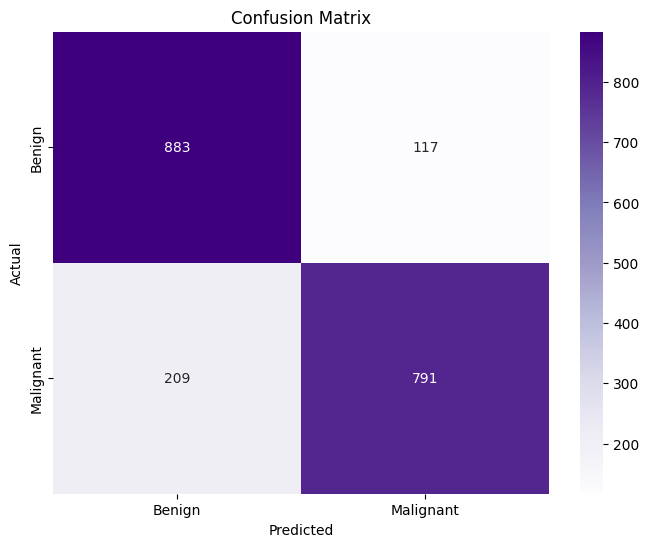

In [55]:
# Menghitung confusion matrix
cm = confusion_matrix(test_data.classes, y_pred_class_func)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Penjelasan**

Berdasarkan confusion matrix, diketahui bahwa:

**a. True Positives (TP):**

    Model dengan benar memprediksi kasus Melanoma Cancer Malignant sejumlah 791 kasus.

**b. True Negatives (TN):**

    Model dengan benar memprediksi kasus Melanoma Cancer Benign sejumlah 883 kasus.

**c. False Positives (FP):**

    Model salah memprediksi 117 kasus Melanoma Cancer `Benign` sebagai Melanoma Cancer `Malignant`

**d. False Negatives (FN):**

    Model salah memprediksi 209 kasus Melanoma Cancer `Malignant` sebagai Melanoma Cancer `Benign`



# **7. ANN Improvment**

## **7.1 Sequential API**

### **a. Model Definition**

In [48]:
# Seed untuk reproduktifitas
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)


model_seq_imp = Sequential()

model_seq_imp.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=seed), input_shape=(img_height, img_width, 3)))
model_seq_imp.add(BatchNormalization())
model_seq_imp.add(MaxPooling2D(2, 2))
model_seq_imp.add(Dropout(0.3))

model_seq_imp.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=seed)))
model_seq_imp.add(BatchNormalization())
model_seq_imp.add(MaxPooling2D(2, 2))
model_seq_imp.add(Dropout(0.3))

model_seq_imp.add(Flatten())
model_seq_imp.add(Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=seed)))
model_seq_imp.add(BatchNormalization())
model_seq_imp.add(Dropout(0.5))
model_seq_imp.add(Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed=seed))) 

# Compile model
model_seq_imp.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Menampilkan ringkasan model
model_seq_imp.summary()

# Callbacks
early_stopping_seq_imp = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_seq_imp_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,417 (91.20 MB)

 Trainable params: 23,907,969 (91.20 MB)

 Non-trainable params: 448 (1.75 KB)

**Penjelasan:**

Berdasarkan hasil model sequential sebelumnya, untuk meningkatkan performa model, maka ditambahkan `kernel_initializer` dan menambahkan `callback early stopping` dengan monitor 'val_loss'. Selain itu, menambahkan layer `batch normalization` setelah layer Conv2D dan Dense untuk menormalkan output dari layer sebelumnya dan mempercepat pelatihan.
Contoh: BatchNormalization(). 

- Early Stooping dengan monitor val_loss bertujuan untuk mencegah model tidak overfitting dan meminimalkan nilai loss secara keseluruhan. 


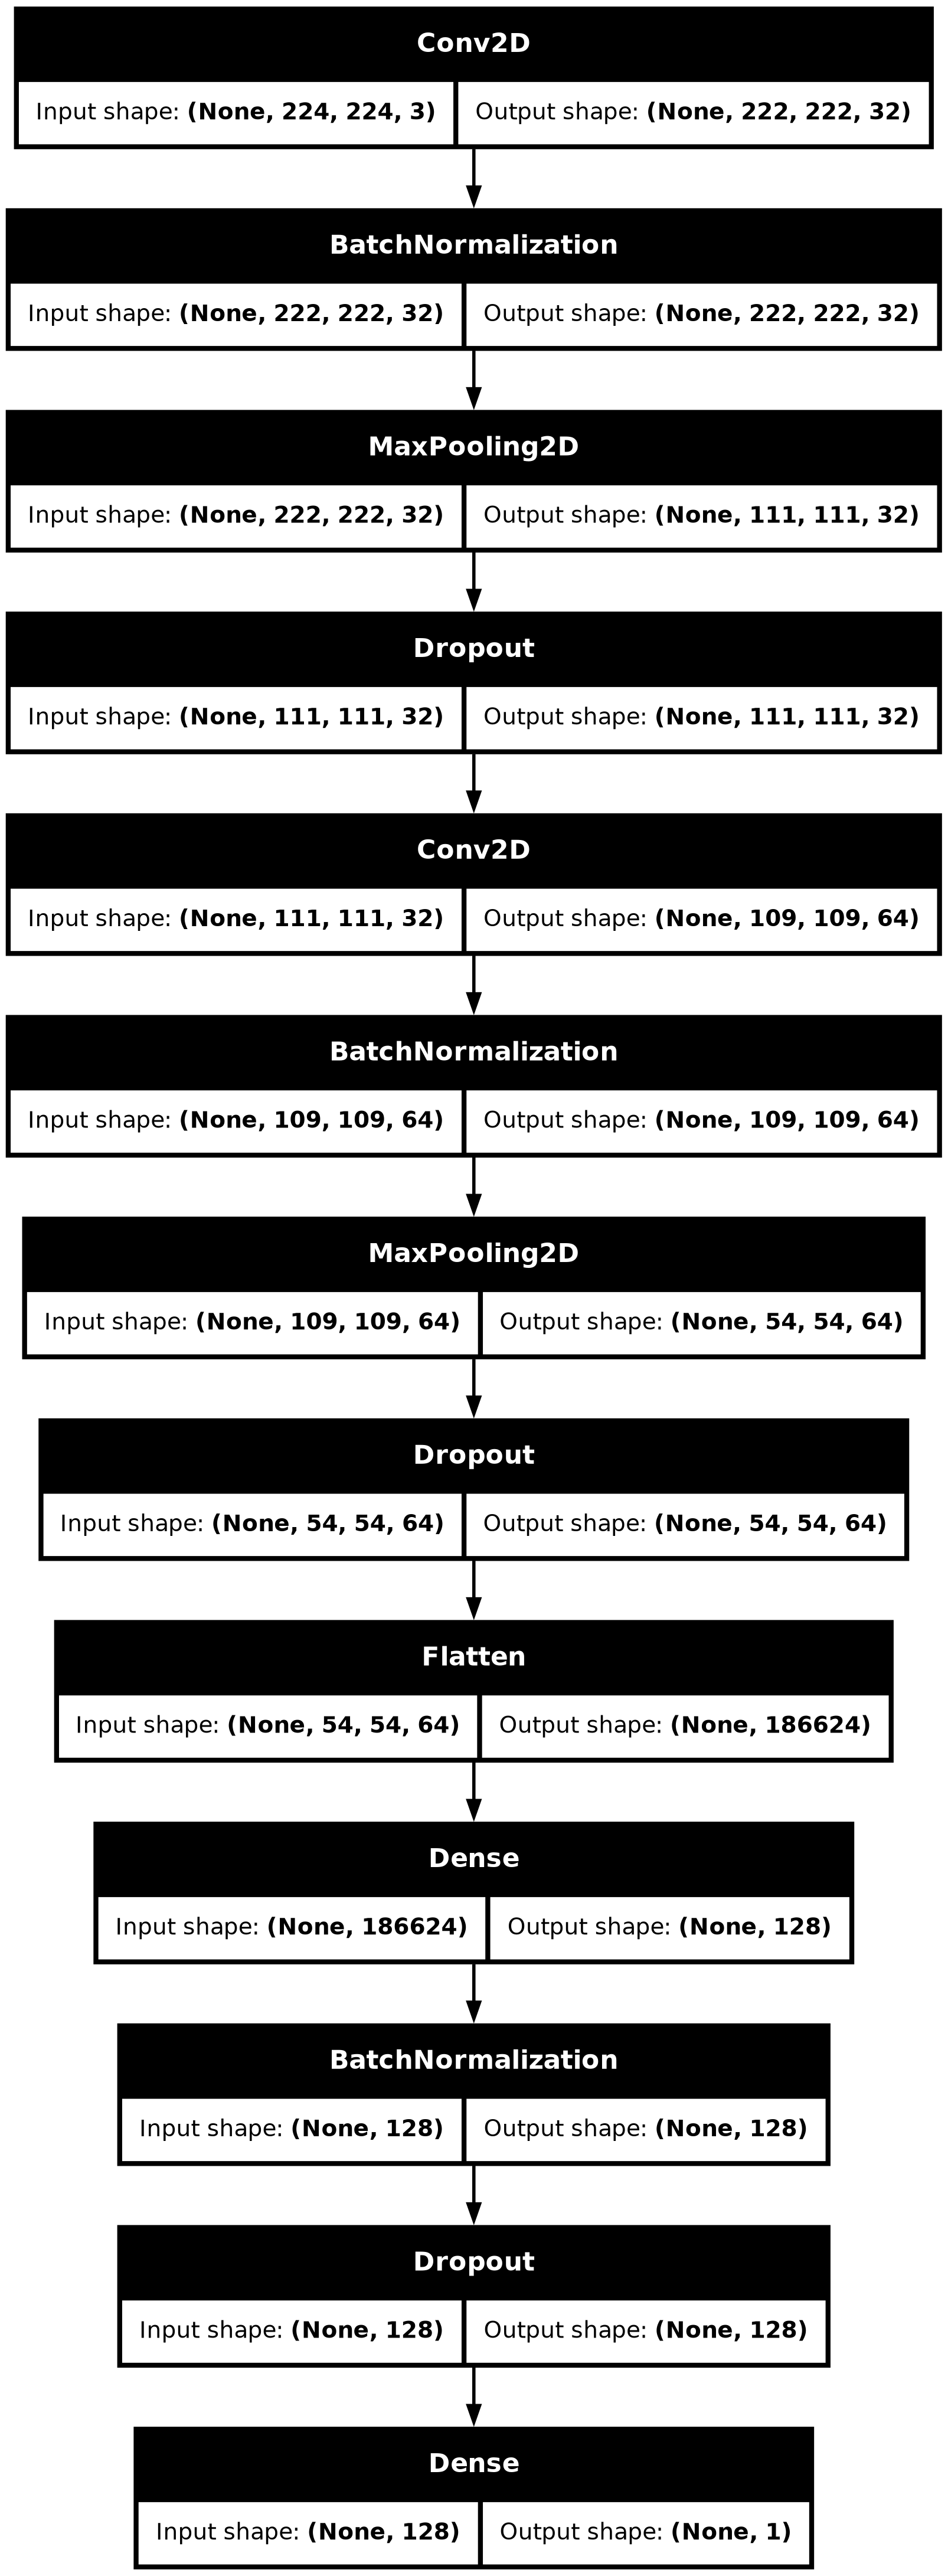

In [49]:
# Plot layers
tf.keras.utils.plot_model(model_seq_imp, show_shapes=True)

**Penjelasan:**

Visualisasi diatas merupakan arsitektur dari model sequential setelah dilakukan improvment yang menampilkan setiap layer dalam model. 

### **b. Model Training**

In [50]:
%%time
history_seq_imp = model_seq_imp.fit(train_data, 
                        epochs=50, 
                        validation_data=validation_data, 
                        callbacks=[early_stopping_seq_imp,
                                  model_seq_imp_checkpoint])

Epoch 1/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 151s 637ms/step - accuracy: 0.7833 - loss: 0.5466 - val_accuracy: 0.7483 - val_loss: 0.4979
Epoch 2/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 133s 585ms/step - accuracy: 0.8293 - loss: 0.3854 - val_accuracy: 0.7569 - val_loss: 0.4930
Epoch 3/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 144s 593ms/step - accuracy: 0.8256 - loss: 0.3831 - val_accuracy: 0.7584 - val_loss: 0.4817
Epoch 4/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 134s 592ms/step - accuracy: 0.8462 - loss: 0.3402 - val_accuracy: 0.8043 - val_loss: 0.3999
Epoch 5/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 132s 580ms/step - accuracy: 0.8529 - loss: 0.3332 - val_accuracy: 0.7956 - val_loss: 0.4175
Epoch 6/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 163s 723ms/step - accuracy: 0.8470 - loss: 0.3382 - val_accuracy: 0.8209 - val_loss: 0.3877
Epoch 7/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 134s 589ms/step - accuracy: 0.8504 - loss: 0.3287 - val_accuracy: 0.7491 - val_loss: 0.4751
Epoch 8/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 133s 586ms/step - accuracy: 0.8518 -

**Penjelasan:**

Hasil tersebut merupakan hasil training model sequential yang telah dilakukan perbaikan pada data training dan validation selama 54 menit 48 detik dan sebanyak 23 epoch. Disini diberikan `Model ChechPoint` untuk menyimpan model terbaik selama data training dan pada epoch ke-21, callback `EarlyStopping` memberhentikan training karena nilai `val_loss` tidak memberikan nilai yang baik selama 5 epoch berturut-turut. Hal tersebut menunjukkan bahwa model telah mencapai kinerja yang optimal pada data validasi pada epoch ke-21. 


### **c. Model Evaluation**

#### **Grafik Model Evaluasi**

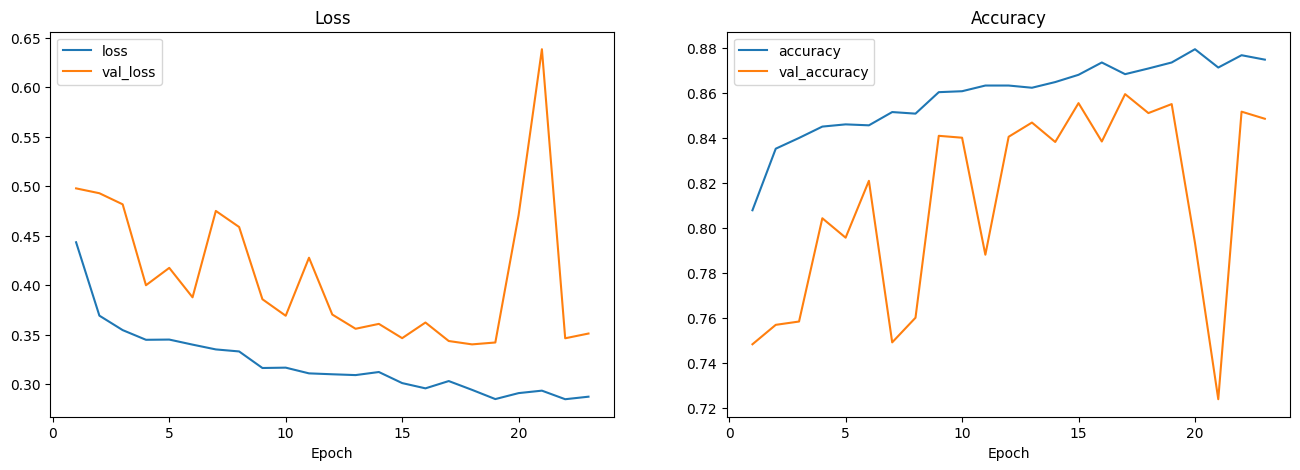

In [51]:
epochs = len(history_seq_imp.history['loss'])

# Visualisasi Loss dan Accuracy
fig, ax = plt.subplots(ncols=2, figsize=(16,5))

# Plot Loss
ax[0].plot(range(1, epochs + 1), history_seq_imp.history['loss'], label='loss')
ax[0].plot(range(1, epochs + 1), history_seq_imp.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

# Plot Accuracy
ax[1].plot(range(1, epochs + 1), history_seq_imp.history['accuracy'], label='accuracy')
ax[1].plot(range(1, epochs + 1), history_seq_imp.history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

**Penjelasan:**

Berdasarkan grafik model evaluasi diketahui bahwa model mengalami overfitting. 

- Pada awal training, nilai loss dan val loss mengalami penurunan yang konsisten dan pada sekitar epoch ke-21 nilai val loss mengalami kenaikan sehingga terdapat beberapa fluktuasi. 

- Nilai accuracy pada data tarining meningkat secara konsisten, namun pada data validasi terdapat beberapa pola fluktuasi dan terjadi penurunan di sekitar epoch ke-21.






#### **Nilai Loss dan Accuracy**

In [52]:
# Evaluasi model
loss, accuracy = model_seq_imp.evaluate(test_data)
print(f"Test Loss Model Sequential Improvment: {loss}")
print(f"Test Accuracy Model Sequential Improvment: {accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.9123 - loss: 0.2380
Test Loss Model Sequential Improvment: 0.3023141622543335
Test Accuracy Model Sequential Improvment: 0.887499988079071


**Penjelasan:**

Berdasarkan hasil evaluasi **model sequential setelah dilakukan improvement**, diketahui bahwa:
- Nilai `Test Loss` sebesar 0.30 yang menunjukkan model cukup baik dalam meminimalkan kesalahan dalam prediksi.

- Nilai `Test Accuracy` sebesar 0.8874 yang menunjukkan model dapat memprediksi kelas yang benar pada sampel data uji sebesar 88.74%


#### **Classification Report**

In [53]:
# Cek Perfoma Data Testing
y_pred_seq_imp = model_seq_imp.predict(test_data)
y_pred_class_seq_imp = np.where(y_pred_seq_imp >= 0.5, 1, 0)  

# Menampilkan Classification Report
print(classification_report(test_data.classes, y_pred_class_seq_imp, target_names=test_data.class_indices))

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step
              precision    recall  f1-score   support

      Benign       0.87      0.91      0.89      1000
   Malignant       0.91      0.86      0.88      1000

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



**Penjelasan:**

Berdasarkan Classification Report pada Model Sequential setelah dilakukan perbaikan, diketahui bahwa:

`a. Precision`
- Nilai Precision pada kelas `Benign` sebesar 0.87 yang artinya 87% semua prediksi yang menyatakan Melanoma Cancer Benign adalah benar-benar Benign.
- Nilai Precision pada kelas `Malignant` sebesar 0.91 yang artinya 91% semua prediksi yang menyatakan Melanoma Cancer Malignant adalah benar-benar Malignant.

`b. Recall`
- Nilai Recall pada kelas `Benign` sebesar 0.91 yang artinya model dapat mengidentifikasi kasus Melanoma Cancer Benign sebesar 91%.
- Nilai Recall pada kelas `Malignant` sebesar 0.86 yang artinya model dapat mengidentifikasi kasus Melanoma Cancer Malignant sebesar 86%

`c. F1-Score`
- Nilai F1-Score pada kelas `Benign` sebesar 0.89 yang artinya keseimbangan antara precision (0.87) dan recall (0.91) cukup baik.
- Nilai F1-Score pada kelas `Malignant` sebesar 0.88 yang artinya keseimbangan antara precision (0.91) dan recall (0.86) cukup baik.

`Kesimpulan`
- Model Sequential setelah dilakukan perbaikan memiliki performa yang baik dengan nilai **accuracy** sebesar `0.89`.

#### **Confusion Matrix**

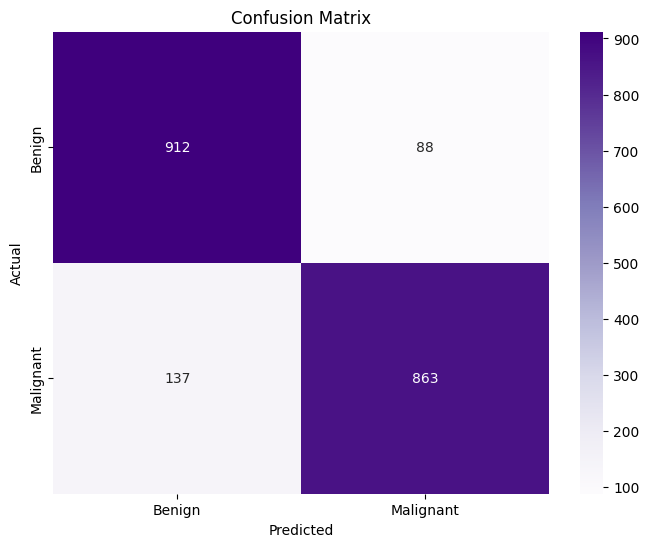

In [54]:
# Menghitung confusion matrix
cm = confusion_matrix(test_data.classes, y_pred_class_seq_imp)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Penjelasan**

Berdasarkan confusion matrix pada model sequential setelah dilakukan perbaikan, diketahui bahwa:

**a. True Positives (TP):**

    Model dengan benar memprediksi kasus Melanoma Cancer Malignant sejumlah 863 kasus.

**b. True Negatives (TN):**

    Model dengan benar memprediksi kasus Melanoma Cancer Benign sejumlah 912 kasus.

**c. False Positives (FP):**

    Model salah memprediksi 88 kasus Melanoma Cancer `Benign` sebagai Melanoma Cancer `Malignant`

**d. False Negatives (FN):**

    Model salah memprediksi 137 kasus Melanoma Cancer `Malignant` sebagai Melanoma Cancer `Benign`



## **7.2 Functional API**

### **a. Model Definition**

In [60]:
# Seed untuk reproduktifitas
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)


inputs = Input(shape=(img_height, img_width, 3))


layer_1 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=seed))(inputs)
layer_1 = layers.BatchNormalization()(layer_1)
layer_1 = layers.MaxPooling2D((2, 2))(layer_1)
layer_1 = layers.Dropout(0.3)(layer_1)


layer_2 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=seed))(inputs)
layer_2 = layers.BatchNormalization()(layer_2)
layer_2 = layers.MaxPooling2D((2, 2))(layer_2)
layer_2 = layers.Dropout(0.3)(layer_2)


merged1 = layers.concatenate([layer_1, layer_2])


layer_3 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=seed))(merged1)
layer_3 = layers.BatchNormalization()(layer_3)
layer_3 = layers.MaxPooling2D((2, 2))(layer_3)

layer_4 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=seed))(merged1)
layer_4 = layers.BatchNormalization()(layer_4)
layer_4 = layers.MaxPooling2D((2, 2))(layer_4)


merged2 = layers.concatenate([layer_3, layer_4])


flatten = layers.Flatten()(merged2)


dense1 = layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=seed))(flatten)
dense1 = layers.BatchNormalization()(dense1)
dense1 = layers.Dropout(0.3)(dense1)


outputs = layers.Dense(1, activation='sigmoid',kernel_initializer=tf.keras.initializers.GlorotNormal(seed=seed))(dense1)


model_func_imp = Model(inputs, outputs)

# Compile
model_func_imp.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

# Menampilkan ringkasan model
model_func_imp.summary()

# Callbacks
early_stopping_func_imp = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_func_imp_checkpoint = ModelCheckpoint('best_model_func.keras', monitor='val_loss', save_best_only=True)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 222, 222,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 222, 222,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 222, 222,  │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 222, 222,  │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 111, 111,  │          0 │ max_pooling2d[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 111, 111,  │          0 │ max_pooling2d_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 111, 111,  │          0 │ dropout[0][0],    │
│ (Concatenate)       │ 48)               │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     27,712 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 109, 109,  │     55,424 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 54, 54,    │          0 │ max_pooling2d_2[

 Total params: 71,749,825 (273.70 MB)

 Trainable params: 71,749,089 (273.70 MB)

 Non-trainable params: 736 (2.88 KB)

**Penjelasan:**

Berdasarkan hasil model functional sebelumnya, untuk meningkatkan performa model, maka ditambahkan `kernel_initializer` dan menambahkan `callback early stopping` dengan monitor 'val_loss'. Selain itu, menambahkan layer `batch normalization` setelah layer Conv2D dan Dense untuk menormalkan output dari layer sebelumnya dan mempercepat pelatihan.
Contoh: BatchNormalization(). 

- Early Stooping dengan monitor val_loss bertujuan untuk mencegah model tidak overfitting dan meminimalkan nilai loss secara keseluruhan. 


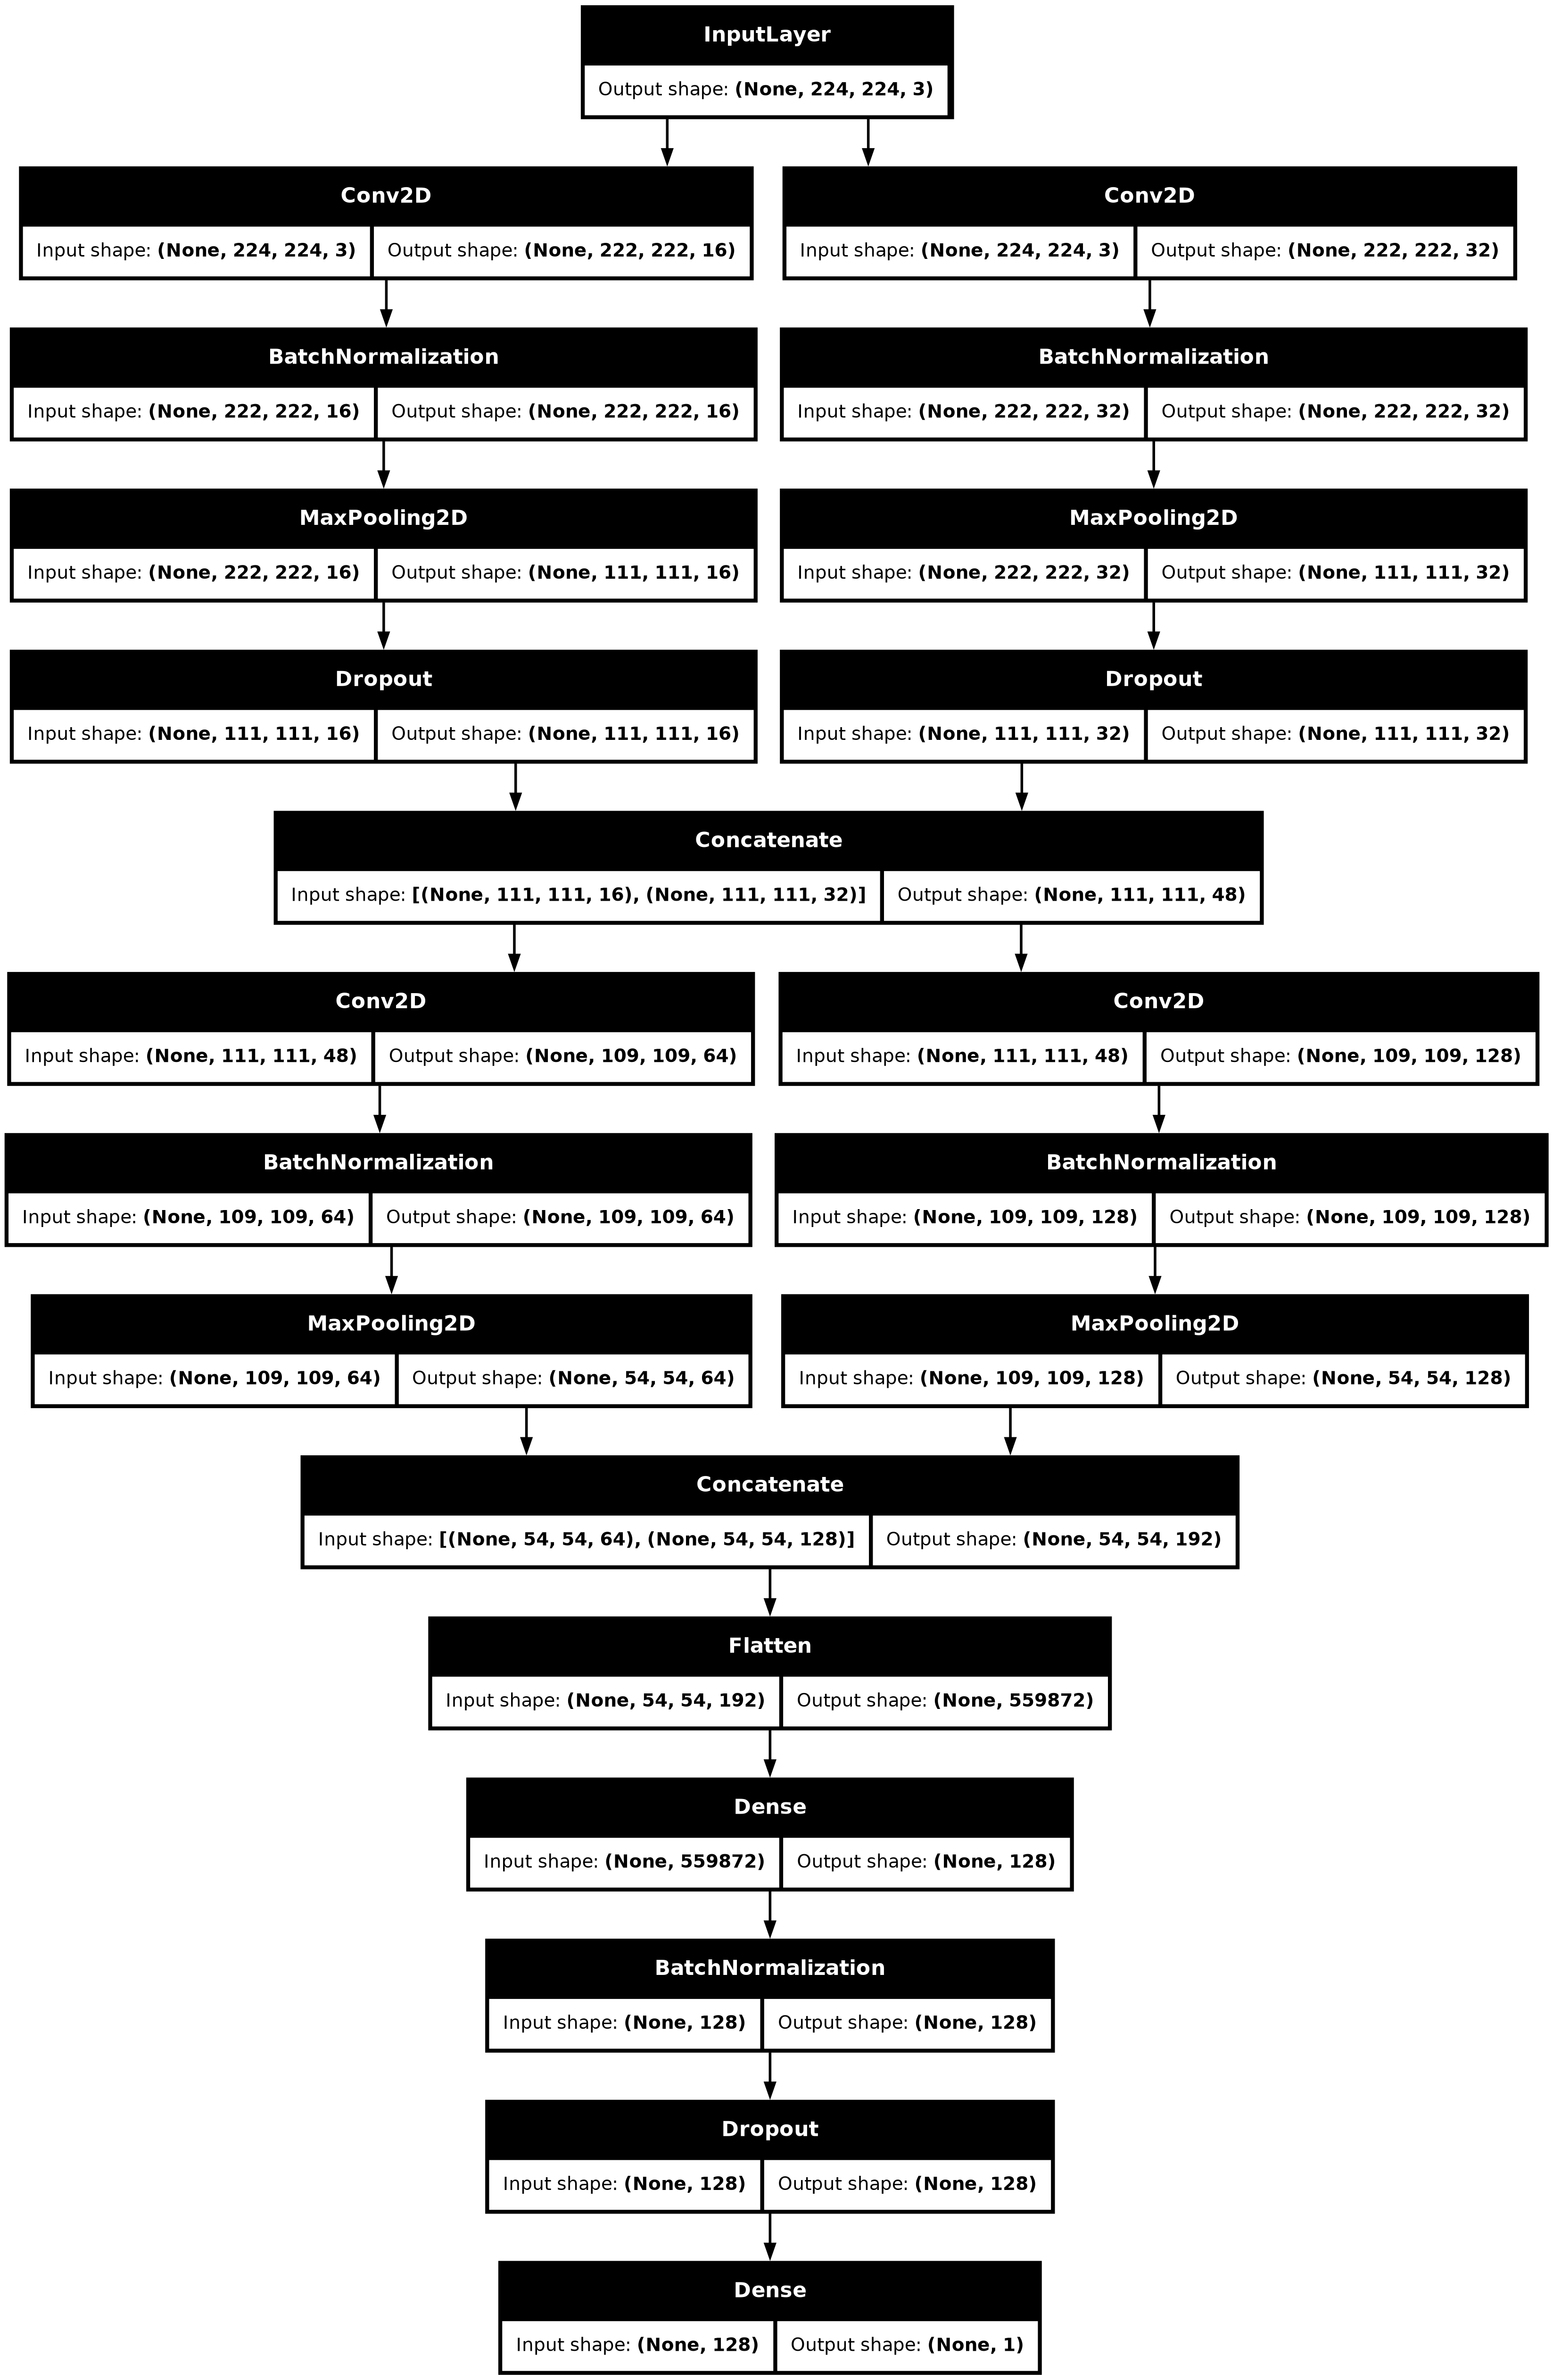

In [59]:
# Plot layers
tf.keras.utils.plot_model(model_func_imp, show_shapes=True)

**Penjelasan:**

Visualisasi diatas merupakan arsitektur dari model functional setelah dilakukan improvment yang menampilkan setiap layer dalam model. 

### **b. Model Training**

In [61]:
%%time
history_func_imp = model_func_imp.fit(train_data, 
                              epochs=50, 
                              validation_data=validation_data, 
                              callbacks=[early_stopping_func_imp,
                                        model_func_imp_checkpoint])

Epoch 1/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 160s 662ms/step - accuracy: 0.8021 - loss: 0.5070 - val_accuracy: 0.6567 - val_loss: 0.6970
Epoch 2/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 139s 613ms/step - accuracy: 0.8411 - loss: 0.3614 - val_accuracy: 0.7306 - val_loss: 0.5300
Epoch 3/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 144s 622ms/step - accuracy: 0.8431 - loss: 0.3460 - val_accuracy: 0.7756 - val_loss: 0.4608
Epoch 4/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 135s 597ms/step - accuracy: 0.8405 - loss: 0.3492 - val_accuracy: 0.7481 - val_loss: 0.4843
Epoch 5/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 138s 607ms/step - accuracy: 0.8537 - loss: 0.3369 - val_accuracy: 0.8101 - val_loss: 0.4113
Epoch 6/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 140s 617ms/step - accuracy: 0.8635 - loss: 0.3255 - val_accuracy: 0.8072 - val_loss: 0.3990
Epoch 7/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 138s 609ms/step - accuracy: 0.8613 - loss: 0.3127 - val_accuracy: 0.8329 - val_loss: 0.3808
Epoch 8/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 164s 726ms/step - accuracy: 0.8592 -

### **c. Model Evaluation**

#### **Grafik Model Evaluasi**

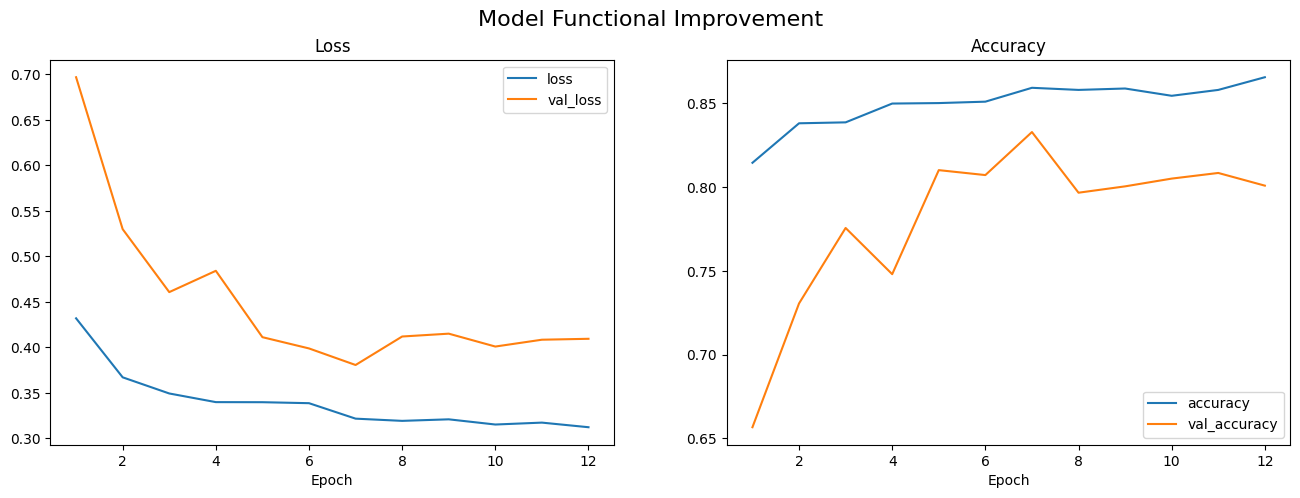

In [62]:
epochs = len(history_func_imp.history['loss'])

# Visualisasi Loss dan Accuracy
fig, ax = plt.subplots(ncols=2, figsize=(16,5))

# Plot Loss
ax[0].plot(range(1, epochs + 1), history_func_imp.history['loss'], label='loss')
ax[0].plot(range(1, epochs + 1), history_func_imp.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

# Plot Accuracy
ax[1].plot(range(1, epochs + 1), history_func_imp.history['accuracy'], label='accuracy')
ax[1].plot(range(1, epochs + 1), history_func_imp.history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

# Menambahkan judul 
fig.suptitle('Model Functional Improvement', fontsize=16)

plt.show()

**Penjelasan:**

Berdasarkan grafik model evaluasi menunjukkan terjadi peningkatan kinerja. Pada data validasi, meskipun masih ada sedikit fluktuasi pada `val_loss` dan `val_accuracy`, secara keseluruhan, model menunjukkan hasil yang lebih baik dibandingkan sebelumnya. Perbaikan seperti penambahan regularisasi dan penyesuaian parameter model telah membantu meningkatkan performa model.




#### **Nilai Loss dan Acuracy**

In [63]:
# Evaluasi model
loss, accuracy = model_func_imp.evaluate(test_data)
print(f"Test Loss Model Functional Improvment: {loss}")
print(f"Test Accuracy Model Functional Improvment: {accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9159 - loss: 0.2214
Test Loss Model Functional Improvment: 0.34775692224502563
Test Accuracy Model Functional Improvment: 0.8579999804496765


**Penjelasan:**

Berdasarkan hasil evaluasi **model functional setelah dilakukan improvement**, diketahui bahwa:
- Nilai `Test Loss` sebesar 0.34 yang menunjukkan model cukup baik dalam meminimalkan kesalahan dalam prediksi.

- Nilai `Test Accuracy` sebesar 0.8579 yang menunjukkan model dapat memprediksi kelas yang benar pada sampel data uji sebesar 85.79%


#### **Classification Report**

In [64]:
# Cek Perfoma Data Testing
y_pred_func_imp = model_func_imp.predict(test_data)
y_pred_class_func_imp = np.where(y_pred_func_imp >= 0.5, 1, 0)  

# Menampilkan Classification Report
print(classification_report(test_data.classes, y_pred_class_func_imp, target_names=test_data.class_indices))

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step
              precision    recall  f1-score   support

      Benign       0.81      0.94      0.87      1000
   Malignant       0.92      0.78      0.85      1000

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



**Penjelasan:**

Berdasarkan Classification Report pada Model Functional setelah dilakukan perbaikan, diketahui bahwa:

`a. Precision`
- Nilai Precision pada kelas `Benign` sebesar 0.81 yang artinya 81% semua prediksi yang menyatakan Melanoma Cancer Benign adalah benar-benar Benign.
- Nilai Precision pada kelas `Malignant` sebesar 0.92 yang artinya 92% semua prediksi yang menyatakan Melanoma Cancer Malignant adalah benar-benar Malignant.

`b. Recall`
- Nilai Recall pada kelas `Benign` sebesar 0.94 yang artinya model dapat mengidentifikasi kasus Melanoma Cancer Benign sebesar 94%.
- Nilai Recall pada kelas `Malignant` sebesar 0.78 yang artinya model dapat mengidentifikasi kasus Melanoma Cancer Malignant sebesar 78%

`c. F1-Score`
- Nilai F1-Score pada kelas `Benign` sebesar 0.87 yang artinya keseimbangan antara precision (0.81) dan recall (0.94) cukup baik.
- Nilai F1-Score pada kelas `Malignant` sebesar 0.85 yang artinya keseimbangan antara precision (0.92) dan recall (0.78) cukup baik.

`Kesimpulan`
- Model Sequential setelah dilakukan perbaikan memiliki performa yang baik dengan nilai **accuracy** sebesar `0.89`.

#### **Confusion Matrix**

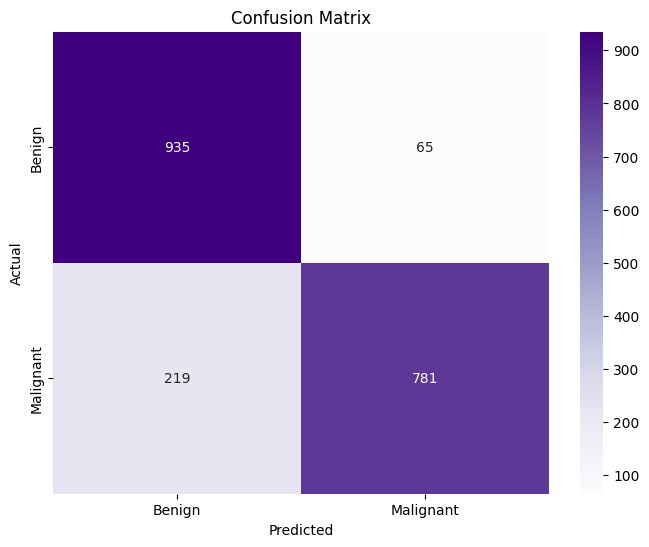

In [65]:
# Menghitung confusion matrix
cm = confusion_matrix(test_data.classes, y_pred_class_func_imp)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Penjelasan**

Berdasarkan confusion matrix pada model functional setelah dilakukan perbaikan, diketahui bahwa:

**a. True Positives (TP):**

    Model dengan benar memprediksi kasus Melanoma Cancer Malignant sejumlah 781 kasus.

**b. True Negatives (TN):**

    Model dengan benar memprediksi kasus Melanoma Cancer Benign sejumlah 935 kasus.

**c. False Positives (FP):**

    Model salah memprediksi 65 kasus Melanoma Cancer `Benign` sebagai Melanoma Cancer `Malignant`

**d. False Negatives (FN):**

    Model salah memprediksi 219 kasus Melanoma Cancer `Malignant` sebagai Melanoma Cancer `Benign`



# **8. Model Saving**

In [69]:
model_seq_imp.save('model_seq_imp.keras')

# **9. Model Inference**

Model inference dikerjakan di file `P2G7_Tasya_Amalia_Inf`

# **10. Conclusion**

### **Model Analysis**

Berdasarkan analisis yang telah dilakukan, kinerja antara model sequential dan functional terdapat perbedaan. Setelah dilakukan perbaikan perfoma model, diketahui bahwa:

- Model Sequential Improvment:
    - Test Loss Model Sequential Improvment: 0.30
    - Test Accuracy Model Sequential Improvment: 0.89


- Model Functional Improvment:
    - Test Loss Model Functional Improvment: 0.34
    - Test Accuracy Model Functional Improvment: 0.86


Oleh karena itu, kami memutuskan untuk memilih model sequential untuk memprediksi kanker kulit melanoma baik jenis jinak maupun ganas. Hal ini dikarenakan model sequential secara keseluruhan memiliki kinerja yang cukup baik dan mampu generalisasi dengan baik pada data yang belum dilihat meskipun terdapat eberapa fluktuasi pada grafik model evaluasi. Untuk memperbaiki hal tersebut, kedepannya dapat menambahkan paramater dengan nilai yang sesuai dan dapat menerapkan transfer learning. Selain itu, perlu dilakukan teknik augmentasi data lainnya untuk membantu model dalam memahami variasi data. 



### **Overall Analysis**

Berdasarkan analisis yang sudah dilakukan, diketahui bahwa:
- `Melanoma Cancer Dataset` memiliki 13.879 gambar mengenai Kanker Kulit Melanoma yang terdiri dari 2 kelas, yaitu `Benign dan Malignant`. Setiap gambar memiliki ukuran 224 x 224 piksel dan warna RGB
- Pada `Data Train` terdapat 5590 data dengan kelas _Malignant_ dan terdapat 6289 data dengan kelas _Benign_.
- Pada `Data Test` terdapat 1000 data dengan kelas _Malignant_ dan terdapat 1000 data dengan kelas _Benign_.

- Model Sequential memiliki nilai akurasi 89% dalam memprediksi kanker kulit melanoma baik jenis jinak maupun ganas. 

- Model sequential memiliki nilai recal yang cukup tinggi, yaitu 91% pada kelas `Benign` dan 86% pada kelas `Malignant`. Dalam dunia medis, nilai recall sangat penting untuk mendeteksi sebanyak mungkin pasien yang benar menderita kanker kulit melanoma malignant atau ganas sehingga mendapatkan perawatan yang tepat waktu dan optimal.

- Selain itu,  Model sequential memiliki nilai F1 Score yang cukup tinggi, yaitu 89% pada kelas `Benign` dan 88% pada kelas `Malignant`. F1 Score dapat menyeimbangkan hasil dari recall dan precision yang memastikan bahwa model tidak hanya mendeteksi sebanyak mungkin penderita kanker kulit melanoma malignant tetapi juga memberikan prediksi yang akurat, yang sangat penting dalam konteks medis untuk memastikan perawatan yang tepat dan mengurangi jumlah alarm palsu.



